<a href="https://colab.research.google.com/github/kwansawanth/BSC_DPDM23/blob/main/%E0%B8%99%E0%B8%84%E0%B8%A3%E0%B8%9E%E0%B8%99%E0%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

เตรียมข้อมูลอุตุนิยมวิทยา (https://drive.google.com/drive/folders/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4?usp=sharing)

ให้เตรียมข้อมูลลักษณะอากาศของแต่ละวัน (แก้ missing, noise, ฯลฯ ) และสร้างตารางเพื่อทำการทำนาย ปริมาณน้ำฝนสำหรับจังหวัดขอนแก่นของวันถัดไป (ปริมาณน้ำฝนขอนแก่นของวันที่ D+1) จากข้อมูลลักษณะอากาศในจังหวัดต่างๆ (ขอนแก่น,หนองคาย,นครพนม,เลย,สกลนคร) ของวันปัจจุบัน (อุณหภูมิตุ้มแห้งขอนแก่นของวันที่ D,...,ความเร็วลมสกลนครของวันที่ D)


ตัวอย่างตารางที่ต้องการ (Xi มีทั้งหมด 5จังหวัด * 8ลักษณะอากาศ = 40 columns และ Y อีก 1 columns)

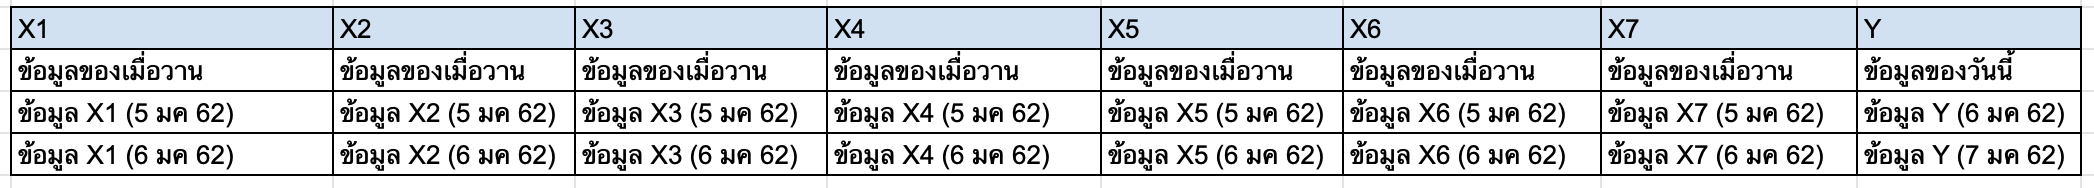

In [199]:
import pandas as pd

In [200]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/bsc2 2566/อุตุ'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#ขอนแก่น

##นำข้อมูลเข้า

In [201]:
press_kk = pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/ความกด(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx', skiprows=4)
Humidity_kk = pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx', skiprows=4)
ws_kk =  pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/ความเร็วลม(นอต)/จ.ขอนแก่น.xlsx', skiprows=4)
cd_kk =   pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/จำนวนเมฆ(10ส่วน)/จ.ขอนแก่น.xlsx', skiprows=4)
dp_kk =   pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.ขอนแก่น.xlsx', skiprows=4)
bt_kk =   pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.ขอนแก่น.xlsx', skiprows=4)
lw_kk =  pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.ขอนแก่น.xlsx', skiprows=4)
rain_kk =  pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.ขอนแก่น.xlsx', skiprows=4)

###กดอากาศ

In [202]:
press_kk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
press_kk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
press_kk.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
press_kk['year'] = press_kk['เดือน-ปี'].dt.year
press_kk['month'] = press_kk['เดือน-ปี'].dt.month
press_kk = press_kk.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
press_kk

,id,สถานี,1,2,3,4,5,6,7,8,...,24,25,26,27,28,29,30,31,year,month
0,1,352201-หนองคาย จ.หนองคาย,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,1010.20,...,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,2011,10
1,2,352201-หนองคาย จ.หนองคาย,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,1007.20,...,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,2011,11
2,3,352201-หนองคาย จ.หนองคาย,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,1011.94,...,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,2011,12
3,1,352201-หนองคาย จ.หนองคาย,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,1018.06,...,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,2012,1
4,2,352201-หนองคาย จ.หนองคาย,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,1009.66,...,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,2012,2
5,3,352201-หนองคาย จ.หนองคาย,1011.50,1011.11,1008.60,1007.07,1008.17,1010.06,1010.11,1010.07,...,1010.20,1009.78,1009.08,1008.67,1008.41,1008.71,1008.7,1011.83,2012,10
6,4,352201-หนองคาย จ.หนองคาย,1012.67,1011.17,1010.47,1010.24,1010.43,1010.90,1009.76,1008.36,...,1010.51,1011.46,1010.77,1010.16,1010.18,1010.04,1009.54,-,2012,11
7,5,352201-หนองคาย จ.หนองคาย,1009.80,1010.17,1010.74,1010.72,1010.61,1012.15,1011.02,1011.34,...,1016.29,1013.54,1011.60,1010.58,1009.61,1009.9,1011.64,1014.86,2012,12
8,6,352201-หนองคาย จ.หนองคาย,1014.58,1013.30,1013.73,1012.89,1011.43,1011.80,1012.20,1011.64,...,1012.54,1012.09,1012.41,1013.80,1016.45,1015.31,1014.99,1015.58,2013,1
9,7,352201-หนองคาย จ.หนองคาย,1015.19,1013.97,1013.89,1013.91,1013.43,1011.11,1008.35,1008.48,...,1013.40,1011.79,1010.17,1007.95,1006.82,-,-,-,2013,2


In [203]:
press_kk_melt = press_kk.set_index(['สถานี','id','year','month']).stack().reset_index()
press_kk_melt.rename(columns={'level_4' : 'day'},inplace=True)
press_kk_melt.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
press_kk_melt['province_id'] = len(press_kk_melt)*['kk']
press_kk_melt.head()

,สถานี,id,year,month,day,ความกดอากาศ(%),province_id
0,352201-หนองคาย จ.หนองคาย,1,2011,10,1,1005.47,kk
1,352201-หนองคาย จ.หนองคาย,1,2011,10,2,1006.65,kk
2,352201-หนองคาย จ.หนองคาย,1,2011,10,3,1007.49,kk
3,352201-หนองคาย จ.หนองคาย,1,2011,10,4,1008.28,kk
4,352201-หนองคาย จ.หนองคาย,1,2011,10,5,1009.88,kk


In [204]:
press_kk_in = press_kk_melt[['province_id','year','month','day','ความกดอากาศ(%)']].reset_index()
press_kk_in_re = press_kk_in[['province_id','index','year','month','day','ความกดอากาศ(%)']]
press_kk_in_re["id"] = press_kk_in_re["province_id"].astype(str) +  press_kk_in_re["index"].astype(str)
press_kk_fin = press_kk_in_re[['id','province_id','year','month','day','ความกดอากาศ(%)']]
press_kk_fin



<ipython-input-204-abbee2776784>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  press_kk_in_re["id"] = press_kk_in_re["province_id"].astype(str) +  press_kk_in_re["index"].astype(str)


,id,province_id,year,month,day,ความกดอากาศ(%)
0,kk0,kk,2011,10,1,1005.47
1,kk1,kk,2011,10,2,1006.65
2,kk2,kk,2011,10,3,1007.49
3,kk3,kk,2011,10,4,1008.28
4,kk4,kk,2011,10,5,1009.88
...,...,...,...,...,...,...
1700,kk1700,kk,2022,2,27,1014.37
1701,kk1701,kk,2022,2,28,1013.04
1702,kk1702,kk,2022,2,29,1013.37
1703,kk1703,kk,2022,2,30,1013.98


###ความชื้นสัมพันทธ์

In [205]:
Humidity_kk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
Humidity_kk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Humidity_kk.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
Humidity_kk['year'] = Humidity_kk['เดือน-ปี'].dt.year
Humidity_kk['month'] = Humidity_kk['เดือน-ปี'].dt.month
Humidity_kk = Humidity_kk.drop(['เดือน-ปี','Unnamed: 34'], axis =1)


In [206]:
Humidity_kk_melt = Humidity_kk.set_index(['สถานี','id','year','month']).stack().reset_index()
Humidity_kk_melt.rename(columns={'level_4' : 'day'},inplace=True)
Humidity_kk_melt.rename(columns={0 : 'ความชื้นสัมพัทธ์(%)'},inplace=True)

Humidity_kk_melt['province_id'] = len(Humidity_kk_melt)*['kk']
Humidity_kk_melt.head()


,สถานี,id,year,month,day,ความชื้นสัมพัทธ์(%),province_id
0,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,1,83,kk
1,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,2,92,kk
2,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,3,86,kk
3,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,4,80,kk
4,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,5,86,kk


In [207]:
Humidity_kk_melt['province_id'] = len(Humidity_kk_melt)*['kk']
Humidity_kk_in = Humidity_kk_melt[['province_id','year','month','day','ความชื้นสัมพัทธ์(%)']].reset_index()
Humidity_kk_in_re = Humidity_kk_in[['province_id','index','year','month','day','ความชื้นสัมพัทธ์(%)']]


In [208]:
Humidity_kk_in_re["id"] = Humidity_kk_in_re["province_id"].astype(str) +  Humidity_kk_in_re["index"].astype(str)

Humidity_kk_fin = Humidity_kk_in_re[['id','province_id','year','month','day','ความชื้นสัมพัทธ์(%)']]
Humidity_kk_fin


<ipython-input-208-41d9a8989b7d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Humidity_kk_in_re["id"] = Humidity_kk_in_re["province_id"].astype(str) +  Humidity_kk_in_re["index"].astype(str)


,id,province_id,year,month,day,ความชื้นสัมพัทธ์(%)
0,kk0,kk,2011,10,1,83
1,kk1,kk,2011,10,2,92
2,kk2,kk,2011,10,3,86
3,kk3,kk,2011,10,4,80
4,kk4,kk,2011,10,5,86
...,...,...,...,...,...,...
1700,kk1700,kk,2022,2,27,58
1701,kk1701,kk,2022,2,28,62
1702,kk1702,kk,2022,2,29,-
1703,kk1703,kk,2022,2,30,-


###ความเร็วลม

In [209]:
ws_kk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
ws_kk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
ws_kk.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
ws_kk['year'] =  ws_kk['เดือน-ปี'].dt.year
ws_kk['month'] =  ws_kk['เดือน-ปี'].dt.month
ws_kk =  ws_kk.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
ws_kk.head()

,id,สถานี,1,2,3,4,5,6,7,8,...,24,25,26,27,28,29,30,31,year,month
0,1,353301-เลย สกษ. จ.เลย,3,2,3,2,2,3,4,3,...,3,5,5,5,4,6,4,5,2011,10
1,2,353301-เลย สกษ. จ.เลย,4,5,3,3,5,2,3,3,...,6,5,5,3,1,3,3,-,2011,11
2,3,353301-เลย สกษ. จ.เลย,3,4,4,4,4,4,4,4,...,6,7,6,5,4,4,6,5,2011,12
3,1,353301-เลย สกษ. จ.เลย,4,2,1,4,4,2,4,6,...,3,4,2,2,1,3,4,4,2012,1
4,2,353301-เลย สกษ. จ.เลย,2,2,3,2,3,1,2,3,...,2,3,2,4,3,3,3,-,2012,2


In [210]:
ws_kk_melt =  ws_kk.set_index(['สถานี','id','year','month']).stack().reset_index()
ws_kk_melt.rename(columns={'level_4' : 'day'},inplace=True)
ws_kk_melt.rename(columns={0 : 'ความเร็วลม(นอต)'},inplace=True)
ws_kk_melt['province_id'] = len( ws_kk_melt)*['kk']
ws_kk_melt.head()

,สถานี,id,year,month,day,ความเร็วลม(นอต),province_id
0,353301-เลย สกษ. จ.เลย,1,2011,10,1,3,kk
1,353301-เลย สกษ. จ.เลย,1,2011,10,2,2,kk
2,353301-เลย สกษ. จ.เลย,1,2011,10,3,3,kk
3,353301-เลย สกษ. จ.เลย,1,2011,10,4,2,kk
4,353301-เลย สกษ. จ.เลย,1,2011,10,5,2,kk


In [211]:
ws_kk_in =  ws_kk_melt[['province_id','year','month','day','ความเร็วลม(นอต)']].reset_index()
ws_kk_in_re =  ws_kk_in[['province_id','index','year','month','day','ความเร็วลม(นอต)']]

ws_kk_in_re["id"] =  ws_kk_in_re["province_id"].astype(str) +   ws_kk_in_re["index"].astype(str)

ws_kk_fin =  ws_kk_in_re[['id','province_id','year','month','day','ความเร็วลม(นอต)']]
ws_kk_fin.head()


<ipython-input-211-a644e0285a4f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ws_kk_in_re["id"] =  ws_kk_in_re["province_id"].astype(str) +   ws_kk_in_re["index"].astype(str)


,id,province_id,year,month,day,ความเร็วลม(นอต)
0,kk0,kk,2011,10,1,3
1,kk1,kk,2011,10,2,2
2,kk2,kk,2011,10,3,3
3,kk3,kk,2011,10,4,2
4,kk4,kk,2011,10,5,2


###จำนวนเมฆ

In [212]:
cd_kk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
cd_kk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
cd_kk.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
cd_kk['year'] =  cd_kk['เดือน-ปี'].dt.year
cd_kk['month'] =  cd_kk['เดือน-ปี'].dt.month
cd_kk =  cd_kk.drop(['เดือน-ปี','Unnamed: 34'], axis =1)

In [213]:
cd_kk_melt =  cd_kk.set_index(['สถานี','id','year','month']).stack().reset_index()
cd_kk_melt.rename(columns={'level_4' : 'day'},inplace=True)
cd_kk_melt.rename(columns={0 : 'จำนวนเมฆ(10ส่วน)'},inplace=True)
cd_kk_melt['province_id'] = len( cd_kk_melt)*['kk']

In [214]:
cd_kk_in =  cd_kk_melt[['province_id','year','month','day','จำนวนเมฆ(10ส่วน)']].reset_index()
cd_kk_in_re =  cd_kk_in[['province_id','index','year','month','day','จำนวนเมฆ(10ส่วน)']]

In [215]:
cd_kk_in_re["id"] =  cd_kk_in_re["province_id"].astype(str) +   cd_kk_in_re["index"].astype(str)
cd_kk_fin =  cd_kk_in_re[['id','province_id','year','month','day','จำนวนเมฆ(10ส่วน)']]
cd_kk_fin.head()


<ipython-input-215-923f61b0714c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_kk_in_re["id"] =  cd_kk_in_re["province_id"].astype(str) +   cd_kk_in_re["index"].astype(str)


,id,province_id,year,month,day,จำนวนเมฆ(10ส่วน)
0,kk0,kk,2011,10,1,9
1,kk1,kk,2011,10,2,10
2,kk2,kk,2011,10,3,10
3,kk3,kk,2011,10,4,8
4,kk4,kk,2011,10,5,10


###อุณหภูมิน้ำค้าง

In [216]:
dp_kk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
dp_kk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
dp_kk.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
dp_kk['year'] =  dp_kk['เดือน-ปี'].dt.year
dp_kk['month'] =  dp_kk['เดือน-ปี'].dt.month
dp_kk =  dp_kk.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
dp_kk_melt =  dp_kk.set_index(['สถานี','id','year','month']).stack().reset_index()
dp_kk_melt.rename(columns={'level_4' : 'day'},inplace=True)
dp_kk_melt.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง (เซลเซียส)'},inplace=True)
dp_kk_melt['province_id'] = len( dp_kk_melt)*['kk']
dp_kk_in =  dp_kk_melt[['province_id','year','month','day','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']].reset_index()
dp_kk_in_re =  dp_kk_in[['province_id','index','year','month','day','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
dp_kk_in_re["id"] =  dp_kk_in_re["province_id"].astype(str) +   dp_kk_in_re["index"].astype(str)
dp_kk_fin =  dp_kk_in_re[['id','province_id','year','month','day','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
dp_kk_fin



<ipython-input-216-98a4f3a0749a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp_kk_in_re["id"] =  dp_kk_in_re["province_id"].astype(str) +   dp_kk_in_re["index"].astype(str)


,id,province_id,year,month,day,อุณหภูมิจุดน้ำค้าง (เซลเซียส)
0,kk0,kk,2011,10,1,24.2
1,kk1,kk,2011,10,2,24.0
2,kk2,kk,2011,10,3,22.9
3,kk3,kk,2011,10,4,21.9
4,kk4,kk,2011,10,5,21.7
...,...,...,...,...,...,...
1700,kk1700,kk,2022,2,27,15.7
1701,kk1701,kk,2022,2,28,17.5
1702,kk1702,kk,2022,2,29,-
1703,kk1703,kk,2022,2,30,-


###อุณหภมิตุ้มแห้ง

In [217]:
bt_kk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
bt_kk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
bt_kk.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
bt_kk['year'] = bt_kk['เดือน-ปี'].dt.year
bt_kk['month'] = bt_kk['เดือน-ปี'].dt.month
bt_kk = bt_kk.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
bt_kk_melt = bt_kk.set_index(['สถานี','id','year','month']).stack().reset_index()
bt_kk_melt.rename(columns={'level_4' : 'day'},inplace=True)
bt_kk_melt.rename(columns={0 : 'อุณหภูมิตุ้มแห้ง (เซลเซียส)'},inplace=True)
bt_kk_melt['province_id'] = len(bt_kk_melt)*['kk']
bt_kk_in = bt_kk_melt[['province_id','year','month','day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']].reset_index()
bt_kk_in_re = bt_kk_in[['province_id','index','year','month','day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
bt_kk_in_re["id"] = bt_kk_in_re["province_id"].astype(str) +  bt_kk_in_re["index"].astype(str)
bt_kk_fin = bt_kk_in_re[['id','province_id','year','month','day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
bt_kk_fin


<ipython-input-217-09afb4207d21>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bt_kk_in_re["id"] = bt_kk_in_re["province_id"].astype(str) +  bt_kk_in_re["index"].astype(str)


,id,province_id,year,month,day,อุณหภูมิตุ้มแห้ง (เซลเซียส)
0,kk0,kk,2011,10,1,27.6
1,kk1,kk,2011,10,2,25.6
2,kk2,kk,2011,10,3,25.6
3,kk3,kk,2011,10,4,25.8
4,kk4,kk,2011,10,5,24.3
...,...,...,...,...,...,...
1700,kk1700,kk,2022,2,27,25.1
1701,kk1701,kk,2022,2,28,25.9
1702,kk1702,kk,2022,2,29,-
1703,kk1703,kk,2022,2,30,-


###อุณหภูมิต่ำสุด

In [218]:
lw_kk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
lw_kk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
lw_kk.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
lw_kk['year'] = lw_kk['เดือน-ปี'].dt.year
lw_kk['month'] = lw_kk['เดือน-ปี'].dt.month
lw_kk = lw_kk.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
lw_kk_melt = lw_kk.set_index(['สถานี','id','year','month']).stack().reset_index()
lw_kk_melt.rename(columns={'level_4' : 'day'},inplace=True)
lw_kk_melt.rename(columns={0 : 'อุณหภูมิต่ำสุด (เซลเซียส)'},inplace=True)
lw_kk_melt['province_id'] = len(lw_kk_melt)*['kk']
lw_kk_in = lw_kk_melt[['province_id','year','month','day','อุณหภูมิต่ำสุด (เซลเซียส)']].reset_index()
lw_kk_in_re = lw_kk_in[['province_id','index','year','month','day','อุณหภูมิต่ำสุด (เซลเซียส)']]
lw_kk_in_re["id"] = lw_kk_in_re["province_id"].astype(str) +  lw_kk_in_re["index"].astype(str)
lw_kk_fin = lw_kk_in_re[['id','province_id','year','month','day','อุณหภูมิต่ำสุด (เซลเซียส)']]
lw_kk_fin


<ipython-input-218-14ed6e76e589>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lw_kk_in_re["id"] = lw_kk_in_re["province_id"].astype(str) +  lw_kk_in_re["index"].astype(str)


,id,province_id,year,month,day,อุณหภูมิต่ำสุด (เซลเซียส)
0,kk0,kk,2011,10,1,24.8
1,kk1,kk,2011,10,2,23.0
2,kk2,kk,2011,10,3,22.1
3,kk3,kk,2011,10,4,22.8
4,kk4,kk,2011,10,5,23.1
...,...,...,...,...,...,...
1700,kk1700,kk,2022,2,27,18.2
1701,kk1701,kk,2022,2,28,-
1702,kk1702,kk,2022,2,29,-
1703,kk1703,kk,2022,2,30,-


###ปริมาณน้ำฝน

In [219]:
rain_kk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
rain_kk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
rain_kk.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
rain_kk['year'] = rain_kk['เดือน-ปี'].dt.year
rain_kk['month'] = rain_kk['เดือน-ปี'].dt.month
rain_kk = rain_kk.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
rain_kk_melt = rain_kk.set_index(['สถานี','id','year','month']).stack().reset_index()
rain_kk_melt.rename(columns={'level_4' : 'day'},inplace=True)
rain_kk_melt.rename(columns={0 : 'ปริมาณน้ำฝน(มิลลิเมตร)'},inplace=True)

rain_kk_melt['province_id'] = len(rain_kk_melt)*['kk']

rain_kk_in = rain_kk_melt[['province_id','year','month','day','ปริมาณน้ำฝน(มิลลิเมตร)']].reset_index()
rain_kk_in_re = rain_kk_in[['province_id','index','year','month','day','ปริมาณน้ำฝน(มิลลิเมตร)']]
rain_kk_in_re["id"] = rain_kk_in_re["province_id"].astype(str) +  rain_kk_in_re["index"].astype(str)

rain_kk_fin = rain_kk_in_re[['id','province_id','year','month','day','ปริมาณน้ำฝน(มิลลิเมตร)']]
rain_kk_fin


<ipython-input-219-c44ddbcc677d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_kk_in_re["id"] = rain_kk_in_re["province_id"].astype(str) +  rain_kk_in_re["index"].astype(str)


,id,province_id,year,month,day,ปริมาณน้ำฝน(มิลลิเมตร)
0,kk0,kk,2011,10,1,1.4
1,kk1,kk,2011,10,2,17.7
2,kk2,kk,2011,10,3,3
3,kk3,kk,2011,10,4,0
4,kk4,kk,2011,10,5,2.2
...,...,...,...,...,...,...
1700,kk1700,kk,2022,2,27,0
1701,kk1701,kk,2022,2,28,-
1702,kk1702,kk,2022,2,29,-
1703,kk1703,kk,2022,2,30,-


###รวมตาราง จ.ขอนแก่น

In [220]:
kk1 = press_kk_fin[['id','province_id','year','month','day','ความกดอากาศ(%)']]
kk2 =  Humidity_kk_fin[['id','ความชื้นสัมพัทธ์(%)']]
kk3 =   ws_kk_fin[['id','ความเร็วลม(นอต)']]
kk4 =  cd_kk_fin[['id','จำนวนเมฆ(10ส่วน)']]
kk5 =   dp_kk_fin[['id','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
kk6 = bt_kk_fin[['id','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
kk7 = lw_kk_fin[['id','อุณหภูมิต่ำสุด (เซลเซียส)']]
kk8 =   rain_kk_fin[['id','ปริมาณน้ำฝน(มิลลิเมตร)']]

In [221]:
merged_kk = pd.merge(kk1, kk2, how='inner')
merged_kk = pd.merge(merged_kk, kk3, how='inner')
merged_kk = pd.merge(merged_kk, kk4, how='inner')
merged_kk = pd.merge(merged_kk, kk5, how='inner')
merged_kk = pd.merge(merged_kk, kk6, how='inner')
merged_kk = pd.merge(merged_kk, kk7, how='inner')
merged_kk = pd.merge(merged_kk, kk8, how='inner')
merged_kk

,id,province_id,year,month,day,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิจุดน้ำค้าง (เซลเซียส),อุณหภูมิตุ้มแห้ง (เซลเซียส),อุณหภูมิต่ำสุด (เซลเซียส),ปริมาณน้ำฝน(มิลลิเมตร)
0,kk0,kk,2011,10,1,1005.47,83,3,9,24.2,27.6,24.8,1.4
1,kk1,kk,2011,10,2,1006.65,92,2,10,24.0,25.6,23.0,17.7
2,kk2,kk,2011,10,3,1007.49,86,3,10,22.9,25.6,22.1,3
3,kk3,kk,2011,10,4,1008.28,80,2,8,21.9,25.8,22.8,0
4,kk4,kk,2011,10,5,1009.88,86,2,10,21.7,24.3,23.1,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,kk1700,kk,2022,2,27,1014.37,58,2,2,15.7,25.1,18.2,0
1701,kk1701,kk,2022,2,28,1013.04,62,2,2,17.5,25.9,-,-
1702,kk1702,kk,2022,2,29,1013.37,-,-,-,-,-,-,-
1703,kk1703,kk,2022,2,30,1013.98,-,-,-,-,-,-,-


#นครพนม

##เข้าข้อมูลกดอากาศ

In [222]:
#ความกด แทนเป็น pressure_ชื่อจังหวัด
#data_from_gsheets.colums = data_from_gsheets.iloc[2] #set heade
press_nkpanom = pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/ความกด(เปอร์เซ็นต์)/จ.นครพนม.xlsx',  skiprows=4 )


In [223]:
press_nkpanom

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1006.30,1007.38,1008.07,1008.44,1010.51,1011.65,1011.24,...,1011.09,1010.64,1012.01,1012.47,1012.46,1012.85,1012.43,1011.69,1012.28,1010.754839
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.28,1011.23,1011.08,1010.96,1010.57,1009.20,1007.99,...,1015.49,1016.09,1014.62,1012.80,1011.83,1010.00,1010.6,1011.13,-,1012.184667
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.15,1013.75,1013.24,1013.94,1013.35,1012.62,1012.48,...,1014.23,1017.58,1019.77,1019.71,1017.34,1017.01,1015.64,1016.89,1017.73,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.56,1014.88,1013.41,1015.85,1016.94,1017.13,1019.21,...,1013.13,1012.45,1013.59,1013.15,1011.56,1010.71,1011.95,1013.77,1015.5,1013.510000
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.98,1013.75,1014.96,1013.52,1011.85,1008.82,1008.15,...,1005.76,1005.13,1004.94,1006.42,1008.93,1007.88,1007.29,1011.13,-,1010.608000
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,1011.86,1011.24,1008.82,1007.46,1008.65,1010.53,1010.41,...,1011.63,1010.67,1010.17,1009.78,1008.53,1008.22,1008.94,1009.54,1012.76,1010.840323
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,1013.26,1011.77,1010.84,1010.77,1011.02,1011.49,1010.06,...,1008.87,1010.93,1011.45,1011.22,1011.43,1010.70,1010.66,1009.89,-,1010.984000
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,1010.12,1010.89,1011.93,1011.30,1012.01,1013.16,1012.68,...,1016.81,1017.31,1014.43,1012.45,1011.32,1010.47,1010.69,1014.48,1016.22,1012.551935
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,1015.52,1014.01,1015.36,1014.22,1012.47,1013.17,1013.46,...,1014.11,1013.65,1013.57,1013.25,1015.31,1016.70,1015.92,1015.57,1016.14,1014.798710
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,1015.63,1014.87,1014.45,1014.43,1013.88,1011.52,1008.45,...,1017.17,1014.55,1012.39,1011.08,1008.62,1007.56,-,-,-,1012.171429


In [224]:
press_nkpanom.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
press_nkpanom.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
press_nkpanom.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
press_nkpanom.head()

,id,สถานี,เดือน-ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1006.30,1007.38,1008.07,1008.44,1010.51,1011.65,1011.24,...,1011.09,1010.64,1012.01,1012.47,1012.46,1012.85,1012.43,1011.69,1012.28,1010.754839
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.28,1011.23,1011.08,1010.96,1010.57,1009.20,1007.99,...,1015.49,1016.09,1014.62,1012.80,1011.83,1010.00,1010.6,1011.13,-,1012.184667
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.15,1013.75,1013.24,1013.94,1013.35,1012.62,1012.48,...,1014.23,1017.58,1019.77,1019.71,1017.34,1017.01,1015.64,1016.89,1017.73,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.56,1014.88,1013.41,1015.85,1016.94,1017.13,1019.21,...,1013.13,1012.45,1013.59,1013.15,1011.56,1010.71,1011.95,1013.77,1015.5,1013.510000
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.98,1013.75,1014.96,1013.52,1011.85,1008.82,1008.15,...,1005.76,1005.13,1004.94,1006.42,1008.93,1007.88,1007.29,1011.13,-,1010.608000


In [225]:
press_nkpanom['year'] = press_nkpanom['เดือน-ปี'].dt.year
press_nkpanom['month'] = press_nkpanom['เดือน-ปี'].dt.month
press_nkpanom = press_nkpanom.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
press_nkpanom.head()

,id,สถานี,1,2,3,4,5,6,7,8,...,24,25,26,27,28,29,30,31,year,month
0,1,352201-หนองคาย จ.หนองคาย,1006.30,1007.38,1008.07,1008.44,1010.51,1011.65,1011.24,1010.68,...,1010.64,1012.01,1012.47,1012.46,1012.85,1012.43,1011.69,1012.28,2011,10
1,2,352201-หนองคาย จ.หนองคาย,1012.28,1011.23,1011.08,1010.96,1010.57,1009.20,1007.99,1007.38,...,1016.09,1014.62,1012.80,1011.83,1010.00,1010.6,1011.13,-,2011,11
2,3,352201-หนองคาย จ.หนองคาย,1012.15,1013.75,1013.24,1013.94,1013.35,1012.62,1012.48,1012.96,...,1017.58,1019.77,1019.71,1017.34,1017.01,1015.64,1016.89,1017.73,2011,12
3,1,352201-หนองคาย จ.หนองคาย,1016.56,1014.88,1013.41,1015.85,1016.94,1017.13,1019.21,1019.57,...,1012.45,1013.59,1013.15,1011.56,1010.71,1011.95,1013.77,1015.5,2012,1
4,2,352201-หนองคาย จ.หนองคาย,1013.98,1013.75,1014.96,1013.52,1011.85,1008.82,1008.15,1011.78,...,1005.13,1004.94,1006.42,1008.93,1007.88,1007.29,1011.13,-,2012,2


In [226]:
#ใช้stack เพื่อ transposed column to row
press_nkpanom_melt = press_nkpanom.set_index(['สถานี','id','year','month']).stack().reset_index()
press_nkpanom_melt

,สถานี,id,year,month,level_4,0
0,352201-หนองคาย จ.หนองคาย,1,2011,10,1,1006.3
1,352201-หนองคาย จ.หนองคาย,1,2011,10,2,1007.38
2,352201-หนองคาย จ.หนองคาย,1,2011,10,3,1008.07
3,352201-หนองคาย จ.หนองคาย,1,2011,10,4,1008.44
4,352201-หนองคาย จ.หนองคาย,1,2011,10,5,1010.51
...,...,...,...,...,...,...
1700,352201-หนองคาย จ.หนองคาย,2,2022,2,27,1016.43
1701,352201-หนองคาย จ.หนองคาย,2,2022,2,28,1013.53
1702,352201-หนองคาย จ.หนองคาย,2,2022,2,29,1013.37
1703,352201-หนองคาย จ.หนองคาย,2,2022,2,30,1013.98


In [227]:
press_nkpanom_melt.rename(columns={'level_4' : 'day'},inplace=True) #เปลี่ยนชื่อเป็นday
press_nkpanom_melt.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
press_nkpanom_melt

,สถานี,id,year,month,day,ความกดอากาศ(%)
0,352201-หนองคาย จ.หนองคาย,1,2011,10,1,1006.3
1,352201-หนองคาย จ.หนองคาย,1,2011,10,2,1007.38
2,352201-หนองคาย จ.หนองคาย,1,2011,10,3,1008.07
3,352201-หนองคาย จ.หนองคาย,1,2011,10,4,1008.44
4,352201-หนองคาย จ.หนองคาย,1,2011,10,5,1010.51
...,...,...,...,...,...,...
1700,352201-หนองคาย จ.หนองคาย,2,2022,2,27,1016.43
1701,352201-หนองคาย จ.หนองคาย,2,2022,2,28,1013.53
1702,352201-หนองคาย จ.หนองคาย,2,2022,2,29,1013.37
1703,352201-หนองคาย จ.หนองคาย,2,2022,2,30,1013.98


In [228]:
press_nkpanom_melt['province_id'] = len(press_nkpanom_melt)*['nkpm']
press_nkpanom_melt


,สถานี,id,year,month,day,ความกดอากาศ(%),province_id
0,352201-หนองคาย จ.หนองคาย,1,2011,10,1,1006.3,nkpm
1,352201-หนองคาย จ.หนองคาย,1,2011,10,2,1007.38,nkpm
2,352201-หนองคาย จ.หนองคาย,1,2011,10,3,1008.07,nkpm
3,352201-หนองคาย จ.หนองคาย,1,2011,10,4,1008.44,nkpm
4,352201-หนองคาย จ.หนองคาย,1,2011,10,5,1010.51,nkpm
...,...,...,...,...,...,...,...
1700,352201-หนองคาย จ.หนองคาย,2,2022,2,27,1016.43,nkpm
1701,352201-หนองคาย จ.หนองคาย,2,2022,2,28,1013.53,nkpm
1702,352201-หนองคาย จ.หนองคาย,2,2022,2,29,1013.37,nkpm
1703,352201-หนองคาย จ.หนองคาย,2,2022,2,30,1013.98,nkpm


In [229]:
press_nkpanom_in = press_nkpanom_melt[['province_id','year','month','day','ความกดอากาศ(%)']].reset_index()
press_nkpanom_in_re = press_nkpanom_in[['province_id','index','year','month','day','ความกดอากาศ(%)']]
press_nkpanom_in_re

,province_id,index,year,month,day,ความกดอากาศ(%)
0,nkpm,0,2011,10,1,1006.3
1,nkpm,1,2011,10,2,1007.38
2,nkpm,2,2011,10,3,1008.07
3,nkpm,3,2011,10,4,1008.44
4,nkpm,4,2011,10,5,1010.51
...,...,...,...,...,...,...
1700,nkpm,1700,2022,2,27,1016.43
1701,nkpm,1701,2022,2,28,1013.53
1702,nkpm,1702,2022,2,29,1013.37
1703,nkpm,1703,2022,2,30,1013.98


In [230]:
press_nkpanom_in_re["id"] = press_nkpanom_in_re["province_id"].astype(str) +  press_nkpanom_in_re["index"].astype(str)

<ipython-input-230-95820054e3c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  press_nkpanom_in_re["id"] = press_nkpanom_in_re["province_id"].astype(str) +  press_nkpanom_in_re["index"].astype(str)


In [231]:
press_nkpanom_fin = press_nkpanom_in_re[['id','province_id','year','month','day','ความกดอากาศ(%)']]
press_nkpanom_fin

,id,province_id,year,month,day,ความกดอากาศ(%)
0,nkpm0,nkpm,2011,10,1,1006.3
1,nkpm1,nkpm,2011,10,2,1007.38
2,nkpm2,nkpm,2011,10,3,1008.07
3,nkpm3,nkpm,2011,10,4,1008.44
4,nkpm4,nkpm,2011,10,5,1010.51
...,...,...,...,...,...,...
1700,nkpm1700,nkpm,2022,2,27,1016.43
1701,nkpm1701,nkpm,2022,2,28,1013.53
1702,nkpm1702,nkpm,2022,2,29,1013.37
1703,nkpm1703,nkpm,2022,2,30,1013.98


##เข้าข้อมูลความชื้นสัมพัทธ์

In [232]:
Humidity_nkpanom = pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.นครพนม.xlsx',  skiprows=4 )

In [233]:
Humidity_nkpanom.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
Humidity_nkpanom.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Humidity_nkpanom.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)

In [234]:
Humidity_nkpanom['year'] = Humidity_nkpanom['เดือน-ปี'].dt.year
Humidity_nkpanom['month'] = Humidity_nkpanom['เดือน-ปี'].dt.month
Humidity_nkpanom = Humidity_nkpanom.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
Humidity_nkpanom.head()

,id,สถานี,1,2,3,4,5,6,7,8,...,24,25,26,27,28,29,30,31,year,month
0,1,357201-นครพนม จ.นครพนม,95,84,74,72,87,88,81,82,...,67,70,69,71,66,72,70,69,2011,10
1,2,357201-นครพนม จ.นครพนม,69,67,70,68,71,68,73,72,...,66,70,78,74,69,66,65,-,2011,11
2,3,357201-นครพนม จ.นครพนม,64,56,62,67,69,77,73,68,...,54,60,61,70,71,63,66,70,2011,12
3,1,357201-นครพนม จ.นครพนม,71,70,64,59,68,69,66,67,...,74,62,67,74,71,61,59,62,2012,1
4,2,357201-นครพนม จ.นครพนม,68,69,66,71,71,71,64,61,...,61,64,64,68,76,69,-,-,2012,2


In [235]:
Humidity_nkpanom_melt = Humidity_nkpanom.set_index(['สถานี','id','year','month']).stack().reset_index()
Humidity_nkpanom_melt.rename(columns={'level_4' : 'day'},inplace=True)
Humidity_nkpanom_melt.rename(columns={0 : 'ความชื้นสัมพัทธ์(%)'},inplace=True)
Humidity_nkpanom_melt.head()

,สถานี,id,year,month,day,ความชื้นสัมพัทธ์(%)
0,357201-นครพนม จ.นครพนม,1,2011,10,1,95
1,357201-นครพนม จ.นครพนม,1,2011,10,2,84
2,357201-นครพนม จ.นครพนม,1,2011,10,3,74
3,357201-นครพนม จ.นครพนม,1,2011,10,4,72
4,357201-นครพนม จ.นครพนม,1,2011,10,5,87


In [236]:
Humidity_nkpanom_melt['province_id'] = len(Humidity_nkpanom_melt)*['nkpm']
Humidity_nkpanom_in = Humidity_nkpanom_melt[['province_id','year','month','day','ความชื้นสัมพัทธ์(%)']].reset_index()
Humidity_nkpanom_in_re = Humidity_nkpanom_in[['province_id','index','year','month','day','ความชื้นสัมพัทธ์(%)']]
Humidity_nkpanom_in_re["id"] = Humidity_nkpanom_in_re["province_id"].astype(str) +  Humidity_nkpanom_in_re["index"].astype(str)
Humidity_nkpanom_fin = Humidity_nkpanom_in_re[['id','province_id','year','month','day','ความชื้นสัมพัทธ์(%)']]
Humidity_nkpanom_fin

<ipython-input-236-ca51ecf3c90c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Humidity_nkpanom_in_re["id"] = Humidity_nkpanom_in_re["province_id"].astype(str) +  Humidity_nkpanom_in_re["index"].astype(str)


,id,province_id,year,month,day,ความชื้นสัมพัทธ์(%)
0,nkpm0,nkpm,2011,10,1,95
1,nkpm1,nkpm,2011,10,2,84
2,nkpm2,nkpm,2011,10,3,74
3,nkpm3,nkpm,2011,10,4,72
4,nkpm4,nkpm,2011,10,5,87
...,...,...,...,...,...,...
1700,nkpm1700,nkpm,2022,2,27,52
1701,nkpm1701,nkpm,2022,2,28,60
1702,nkpm1702,nkpm,2022,2,29,-
1703,nkpm1703,nkpm,2022,2,30,-


##เข้าความเร็วลม

In [237]:
ws_nkpanom = pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/ความเร็วลม(นอต)/จ.นครพนม.xlsx',  skiprows=4 )
ws_nkpanom.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
ws_nkpanom.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
ws_nkpanom.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
ws_nkpanom.head()

,id,สถานี,เดือน-ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,1,2,2,1,0,2,...,1,2,2,1,2,2,1,1,1,1.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,1,1,1,1,1,1,...,3,3,2,2,1,1,1,1,-,1.200000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,2,2,1,1,1,1,...,1,3,3,1,2,1,1,2,2,1.741935
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5,2,3,3,...,4,1,5,1,1,1,4,5,4,2.448276
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,1,3,4,0,0,1,1,...,1,2,2,3,3,3,1,2,-,2.200000


In [238]:
ws_nkpanom['year'] = ws_nkpanom['เดือน-ปี'].dt.year
ws_nkpanom['month'] = ws_nkpanom['เดือน-ปี'].dt.month
ws_nkpanom = ws_nkpanom.drop(['เดือน-ปี','Unnamed: 34'], axis =1)

In [239]:
ws_nkpanom_melt = ws_nkpanom.set_index(['สถานี','id','year','month']).stack().reset_index()
ws_nkpanom_melt.rename(columns={'level_4' : 'day'},inplace=True)
ws_nkpanom_melt.rename(columns={0 : 'ความเร็วลม(นอต)'},inplace=True)
ws_nkpanom_melt.head()

,สถานี,id,year,month,day,ความเร็วลม(นอต)
0,353301-เลย สกษ. จ.เลย,1,2011,10,1,1
1,353301-เลย สกษ. จ.เลย,1,2011,10,2,1
2,353301-เลย สกษ. จ.เลย,1,2011,10,3,2
3,353301-เลย สกษ. จ.เลย,1,2011,10,4,2
4,353301-เลย สกษ. จ.เลย,1,2011,10,5,1


In [240]:
ws_nkpanom_melt['province_id'] = len(ws_nkpanom_melt)*['nkpm']
ws_nkpanom_in = ws_nkpanom_melt[['province_id','year','month','day','ความเร็วลม(นอต)']].reset_index()
ws_nkpanom_in_re = ws_nkpanom_in[['province_id','index','year','month','day','ความเร็วลม(นอต)']]
ws_nkpanom_in_re

,province_id,index,year,month,day,ความเร็วลม(นอต)
0,nkpm,0,2011,10,1,1
1,nkpm,1,2011,10,2,1
2,nkpm,2,2011,10,3,2
3,nkpm,3,2011,10,4,2
4,nkpm,4,2011,10,5,1
...,...,...,...,...,...,...
1700,nkpm,1700,2022,2,27,2
1701,nkpm,1701,2022,2,28,1
1702,nkpm,1702,2022,2,29,-
1703,nkpm,1703,2022,2,30,-


In [241]:
ws_nkpanom_in_re["id"] = ws_nkpanom_in_re["province_id"].astype(str) +  ws_nkpanom_in_re['index'].astype(str)
ws_nkpanom_fin = ws_nkpanom_in_re[['id','province_id','year','month','day','ความเร็วลม(นอต)']]
ws_nkpanom_fin

<ipython-input-241-0f7b1fdd60a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ws_nkpanom_in_re["id"] = ws_nkpanom_in_re["province_id"].astype(str) +  ws_nkpanom_in_re['index'].astype(str)


,id,province_id,year,month,day,ความเร็วลม(นอต)
0,nkpm0,nkpm,2011,10,1,1
1,nkpm1,nkpm,2011,10,2,1
2,nkpm2,nkpm,2011,10,3,2
3,nkpm3,nkpm,2011,10,4,2
4,nkpm4,nkpm,2011,10,5,1
...,...,...,...,...,...,...
1700,nkpm1700,nkpm,2022,2,27,2
1701,nkpm1701,nkpm,2022,2,28,1
1702,nkpm1702,nkpm,2022,2,29,-
1703,nkpm1703,nkpm,2022,2,30,-


##นำเข้าจำนวนเมฆ

In [242]:

cd_nkpanom = pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/จำนวนเมฆ(10ส่วน)/จ.นครพนม.xlsx',  skiprows=4 )
cd_nkpanom.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
cd_nkpanom.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
cd_nkpanom.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
cd_nkpanom.head()


,id,สถานี,เดือน-ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,10,7,8,8,10,10,9,...,2,2,2,2,3,3,4,2,4,5.903226
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,2,2,3,5,7,9,...,4,4,4,2,2,2,1,1,-,3.066667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,2,2,4,4,7,8,...,4,2,2,2,2,1,2,1,1,3.290323
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,4,6,4,2,5,...,5,3,2,2,2,3,3,6,5,4.741935
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,5,5,8,7,3,3,2,...,2,2,2,3,7,6,2,1,-,2.966667


In [243]:
cd_nkpanom.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
cd_nkpanom.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
cd_nkpanom.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)


In [244]:
cd_nkpanom['year'] = cd_nkpanom['เดือน-ปี'].dt.year
cd_nkpanom['month'] = cd_nkpanom['เดือน-ปี'].dt.month
cd_nkpanom = cd_nkpanom.drop(['เดือน-ปี','Unnamed: 34'], axis =1)


In [245]:
cd_nkpanom_melt = cd_nkpanom.set_index(['สถานี','id','year','month']).stack().reset_index()
cd_nkpanom_melt.rename(columns={'level_4' : 'day'},inplace=True)
cd_nkpanom_melt.rename(columns={0 : 'จำนวนเมฆ(10ส่วน)'},inplace=True)


In [246]:
cd_nkpanom_melt['province_id'] = len(cd_nkpanom_melt)*['nkpm']
cd_nkpanom_in = cd_nkpanom_melt[['province_id','year','month','day','จำนวนเมฆ(10ส่วน)']].reset_index()
cd_nkpanom_in_re = cd_nkpanom_in[['province_id','index','year','month','day','จำนวนเมฆ(10ส่วน)']]

cd_nkpanom_in_re["id"] = cd_nkpanom_in_re["province_id"].astype(str) +  cd_nkpanom_in_re["index"].astype(str)
cd_nkpanom_fin = cd_nkpanom_in_re[['id','province_id','year','month','day','จำนวนเมฆ(10ส่วน)']]
cd_nkpanom_fin




<ipython-input-246-9d4357c179b7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_nkpanom_in_re["id"] = cd_nkpanom_in_re["province_id"].astype(str) +  cd_nkpanom_in_re["index"].astype(str)


,id,province_id,year,month,day,จำนวนเมฆ(10ส่วน)
0,nkpm0,nkpm,2011,10,1,10
1,nkpm1,nkpm,2011,10,2,7
2,nkpm2,nkpm,2011,10,3,8
3,nkpm3,nkpm,2011,10,4,8
4,nkpm4,nkpm,2011,10,5,10
...,...,...,...,...,...,...
1700,nkpm1700,nkpm,2022,2,27,1
1701,nkpm1701,nkpm,2022,2,28,0
1702,nkpm1702,nkpm,2022,2,29,-
1703,nkpm1703,nkpm,2022,2,30,-


##เข้าอุณหภูมิจุดน้ำค้าง (เซลเซียส)

In [247]:
dp_nkpanom = pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.นครพนม.xlsx',  skiprows=4 )
dp_nkpanom.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
dp_nkpanom.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
dp_nkpanom.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)


In [248]:
dp_nkpanom['year'] = dp_nkpanom['เดือน-ปี'].dt.year
dp_nkpanom['month'] = dp_nkpanom['เดือน-ปี'].dt.month
dp_nkpanom = dp_nkpanom.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
dp_nkpanom_melt = dp_nkpanom.set_index(['สถานี','id','year','month']).stack().reset_index()
dp_nkpanom_melt.rename(columns={'level_4' : 'day'},inplace=True)
dp_nkpanom_melt.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง (เซลเซียส)'},inplace=True)



In [249]:
dp_nkpanom_melt['province_id'] = len(dp_nkpanom_melt)*['nkpm']
dp_nkpanom_in = dp_nkpanom_melt[['province_id','year','month','day','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']].reset_index()
dp_nkpanom_in_re = dp_nkpanom_in[['province_id','index','year','month','day','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
dp_nkpanom_in_re["id"] = dp_nkpanom_in_re["province_id"].astype(str) +  dp_nkpanom_in_re["index"].astype(str)
dp_nkpanom_fin = dp_nkpanom_in_re[['id','province_id','year','month','day','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
dp_nkpanom_fin



<ipython-input-249-6f780de659f9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp_nkpanom_in_re["id"] = dp_nkpanom_in_re["province_id"].astype(str) +  dp_nkpanom_in_re["index"].astype(str)


,id,province_id,year,month,day,อุณหภูมิจุดน้ำค้าง (เซลเซียส)
0,nkpm0,nkpm,2011,10,1,25.1
1,nkpm1,nkpm,2011,10,2,23.1
2,nkpm2,nkpm,2011,10,3,20.1
3,nkpm3,nkpm,2011,10,4,18.9
4,nkpm4,nkpm,2011,10,5,20.7
...,...,...,...,...,...,...
1700,nkpm1700,nkpm,2022,2,27,13.2
1701,nkpm1701,nkpm,2022,2,28,14.9
1702,nkpm1702,nkpm,2022,2,29,-
1703,nkpm1703,nkpm,2022,2,30,-


##เข้าอุณหภูมิจตุ้มแห้ง (เซลเซียส)

In [250]:
bt_nkpanom = pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.นครพนม.xlsx',  skiprows=4 )

In [251]:
bt_nkpanom.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
bt_nkpanom.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
bt_nkpanom.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
bt_nkpanom['year'] = bt_nkpanom['เดือน-ปี'].dt.year
bt_nkpanom['month'] = bt_nkpanom['เดือน-ปี'].dt.month
bt_nkpanom = bt_nkpanom.drop(['เดือน-ปี','Unnamed: 34'], axis =1)

In [252]:
bt_nkpanom_melt = bt_nkpanom.set_index(['สถานี','id','year','month']).stack().reset_index()
bt_nkpanom_melt.rename(columns={'level_4' : 'day'},inplace=True)
bt_nkpanom_melt.rename(columns={0 : 'อุณหภูมิตุ้มแห้ง (เซลเซียส)'},inplace=True)
bt_nkpanom_melt['province_id'] = len(bt_nkpanom_melt)*['nkpm']
bt_nkpanom_in = bt_nkpanom_melt[['province_id','year','month','day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']].reset_index()
bt_nkpanom_in_re = bt_nkpanom_in[['province_id','index','year','month','day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]

In [253]:
bt_nkpanom_in_re["id"] = bt_nkpanom_in_re["province_id"].astype(str) +  bt_nkpanom_in_re["index"].astype(str)
bt_nkpanom_fin = bt_nkpanom_in_re[['id','province_id','year','month','day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
bt_nkpanom_fin


<ipython-input-253-f194d50cf437>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bt_nkpanom_in_re["id"] = bt_nkpanom_in_re["province_id"].astype(str) +  bt_nkpanom_in_re["index"].astype(str)


,id,province_id,year,month,day,อุณหภูมิตุ้มแห้ง (เซลเซียส)
0,nkpm0,nkpm,2011,10,1,25.9
1,nkpm1,nkpm,2011,10,2,26.1
2,nkpm2,nkpm,2011,10,3,25.3
3,nkpm3,nkpm,2011,10,4,24.7
4,nkpm4,nkpm,2011,10,5,23.1
...,...,...,...,...,...,...
1700,nkpm1700,nkpm,2022,2,27,24.1
1701,nkpm1701,nkpm,2022,2,28,24.0
1702,nkpm1702,nkpm,2022,2,29,-
1703,nkpm1703,nkpm,2022,2,30,-


##เข้าอุณหภูมิต่ำสุด (เซลเซียส)

In [254]:
lw_nkpanom = pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.นครพนม.xlsx',  skiprows=4 )

In [255]:
lw_nkpanom.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
lw_nkpanom.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
lw_nkpanom.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
lw_nkpanom['year'] = lw_nkpanom['เดือน-ปี'].dt.year
lw_nkpanom['month'] = lw_nkpanom['เดือน-ปี'].dt.month
lw_nkpanom = lw_nkpanom.drop(['เดือน-ปี','Unnamed: 34'], axis =1)

In [256]:
lw_nkpanom_melt = lw_nkpanom.set_index(['สถานี','id','year','month']).stack().reset_index()
lw_nkpanom_melt.rename(columns={'level_4' : 'day'},inplace=True)
lw_nkpanom_melt.rename(columns={0 : 'อุณหภูมิต่ำสุด (เซลเซียส)'},inplace=True)
lw_nkpanom_melt['province_id'] = len(lw_nkpanom_melt)*['nkpm']
lw_nkpanom_in = lw_nkpanom_melt[['province_id','year','month','day','อุณหภูมิต่ำสุด (เซลเซียส)']].reset_index()
lw_nkpanom_in_re = lw_nkpanom_in[['province_id','index','year','month','day','อุณหภูมิต่ำสุด (เซลเซียส)']]


In [257]:
lw_nkpanom_in_re["id"] = lw_nkpanom_in_re["province_id"].astype(str) +  lw_nkpanom_in_re["index"].astype(str)
lw_nkpanom_fin = lw_nkpanom_in_re[['id','province_id','year','month','day','อุณหภูมิต่ำสุด (เซลเซียส)']]
lw_nkpanom_fin


<ipython-input-257-b26997b91829>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lw_nkpanom_in_re["id"] = lw_nkpanom_in_re["province_id"].astype(str) +  lw_nkpanom_in_re["index"].astype(str)


,id,province_id,year,month,day,อุณหภูมิต่ำสุด (เซลเซียส)
0,nkpm0,nkpm,2011,10,1,25.0
1,nkpm1,nkpm,2011,10,2,23.4
2,nkpm2,nkpm,2011,10,3,22.2
3,nkpm3,nkpm,2011,10,4,20.6
4,nkpm4,nkpm,2011,10,5,21.1
...,...,...,...,...,...,...
1700,nkpm1700,nkpm,2022,2,27,18.1
1701,nkpm1701,nkpm,2022,2,28,16
1702,nkpm1702,nkpm,2022,2,29,-
1703,nkpm1703,nkpm,2022,2,30,-


##เข้าปริมาณน้ำฝน(มิลลิเมตร)

In [258]:
rain_nkpanom = pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.นครพนม.xlsx',  skiprows=4 )

In [259]:
rain_nkpanom.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
rain_nkpanom.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
rain_nkpanom.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
rain_nkpanom['year'] = rain_nkpanom['เดือน-ปี'].dt.year
rain_nkpanom['month'] = rain_nkpanom['เดือน-ปี'].dt.month
rain_nkpanom = rain_nkpanom.drop(['เดือน-ปี','Unnamed: 34'], axis =1)

In [260]:
rain_nkpanom_melt = rain_nkpanom.set_index(['สถานี','id','year','month']).stack().reset_index()
rain_nkpanom_melt.rename(columns={'level_4' : 'day'},inplace=True)
rain_nkpanom_melt.rename(columns={0 : 'ปริมาณน้ำฝน(มิลลิเมตร)'},inplace=True)

rain_nkpanom_melt['province_id'] = len(rain_nkpanom_melt)*['nkpm']

rain_nkpanom_in = rain_nkpanom_melt[['province_id','year','month','day','ปริมาณน้ำฝน(มิลลิเมตร)']].reset_index()
rain_nkpanom_in_re = rain_nkpanom_in[['province_id','index','year','month','day','ปริมาณน้ำฝน(มิลลิเมตร)']]

In [261]:
rain_nkpanom_in_re["id"] = rain_nkpanom_in_re["province_id"].astype(str) +  rain_nkpanom_in_re["index"].astype(str)

rain_nkpanom_fin = rain_nkpanom_in_re[['id','province_id','year','month','day','ปริมาณน้ำฝน(มิลลิเมตร)']]
rain_nkpanom_fin


<ipython-input-261-56e0b309adff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_nkpanom_in_re["id"] = rain_nkpanom_in_re["province_id"].astype(str) +  rain_nkpanom_in_re["index"].astype(str)


,id,province_id,year,month,day,ปริมาณน้ำฝน(มิลลิเมตร)
0,nkpm0,nkpm,2011,10,1,17
1,nkpm1,nkpm,2011,10,2,0.3
2,nkpm2,nkpm,2011,10,3,0
3,nkpm3,nkpm,2011,10,4,0.3
4,nkpm4,nkpm,2011,10,5,1.9
...,...,...,...,...,...,...
1700,nkpm1700,nkpm,2022,2,27,0
1701,nkpm1701,nkpm,2022,2,28,0
1702,nkpm1702,nkpm,2022,2,29,-
1703,nkpm1703,nkpm,2022,2,30,-


##รวมตาราง จ.นครพนม

In [262]:
df1 = press_nkpanom_fin[['id','province_id','year','month','day','ความกดอากาศ(%)']]
df2 =  Humidity_nkpanom_fin[['id','ความชื้นสัมพัทธ์(%)']]
df3 =   ws_nkpanom_fin[['id','ความเร็วลม(นอต)']]
df4 =  cd_nkpanom_fin[['id','จำนวนเมฆ(10ส่วน)']]
df5 =   dp_nkpanom_fin[['id','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
df6 = bt_nkpanom_fin[['id','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
df7 = lw_nkpanom_fin[['id','อุณหภูมิต่ำสุด (เซลเซียส)']]
df8 =   rain_nkpanom_fin[['id','ปริมาณน้ำฝน(มิลลิเมตร)']]

In [263]:
merged_df = pd.merge(df1, df2, how='inner')
merged_df = pd.merge(merged_df, df3, how='inner')
merged_df = pd.merge(merged_df, df4, how='inner')
merged_df = pd.merge(merged_df, df5, how='inner')
merged_df = pd.merge(merged_df, df6, how='inner')
merged_df = pd.merge(merged_df, df7, how='inner')
merged_df = pd.merge(merged_df, df8, how='inner')
merged_df

,id,province_id,year,month,day,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิจุดน้ำค้าง (เซลเซียส),อุณหภูมิตุ้มแห้ง (เซลเซียส),อุณหภูมิต่ำสุด (เซลเซียส),ปริมาณน้ำฝน(มิลลิเมตร)
0,nkpm0,nkpm,2011,10,1,1006.3,95,1,10,25.1,25.9,25.0,17
1,nkpm1,nkpm,2011,10,2,1007.38,84,1,7,23.1,26.1,23.4,0.3
2,nkpm2,nkpm,2011,10,3,1008.07,74,2,8,20.1,25.3,22.2,0
3,nkpm3,nkpm,2011,10,4,1008.44,72,2,8,18.9,24.7,20.6,0.3
4,nkpm4,nkpm,2011,10,5,1010.51,87,1,10,20.7,23.1,21.1,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,nkpm1700,nkpm,2022,2,27,1016.43,52,2,1,13.2,24.1,18.1,0
1701,nkpm1701,nkpm,2022,2,28,1013.53,60,1,0,14.9,24.0,16,0
1702,nkpm1702,nkpm,2022,2,29,1013.37,-,-,-,-,-,-,-
1703,nkpm1703,nkpm,2022,2,30,1013.98,-,-,-,-,-,-,-


#สกลนคร

##เข้าข้อมูล

In [264]:
press_skn = pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/ความกด(เปอร์เซ็นต์)/จ.สกลนคร.xlsx', skiprows=4)
Humidity_skn = pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.สกลนคร.xlsx', skiprows=4)
ws_skn =  pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/ความเร็วลม(นอต)/จ.สกลนคร.xlsx', skiprows=4)
cd_skn =   pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/จำนวนเมฆ(10ส่วน)/จ.สกลนคร.xlsx', skiprows=4)
dp_skn =  pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.สกล.xlsx', skiprows=4)
bt_skn =   pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.สกล.xlsx', skiprows=4)
lw_skn =  pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.สกล.xlsx', skiprows=4)
rain_skn =  pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.สกล.xlsx', skiprows=4)

##กดอากาศ

In [265]:
press_skn.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
press_skn.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
press_skn.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
press_skn['year'] = press_skn['เดือน-ปี'].dt.year
press_skn['month'] = press_skn['เดือน-ปี'].dt.month
press_skn = press_skn.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
press_skn
press_skn_melt = press_skn.set_index(['สถานี','id','year','month']).stack().reset_index()
press_skn_melt.rename(columns={'level_4' : 'day'},inplace=True)
press_skn_melt.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
press_skn_melt['province_id'] = len(press_skn_melt)*['skn']
press_skn_melt.head()
press_skn_in = press_skn_melt[['province_id','year','month','day','ความกดอากาศ(%)']].reset_index()
press_skn_in_re = press_skn_in[['province_id','index','year','month','day','ความกดอากาศ(%)']]
press_skn_in_re["id"] = press_skn_in_re["province_id"].astype(str) + press_skn_in_re["index"].astype(str)
press_skn_fin = press_skn_in_re[['id','province_id','year','month','day','ความกดอากาศ(%)']]
press_skn_fin

<ipython-input-265-1810e858f757>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  press_skn_in_re["id"] = press_skn_in_re["province_id"].astype(str) + press_skn_in_re["index"].astype(str)


,id,province_id,year,month,day,ความกดอากาศ(%)
0,skn0,skn,2011,10,1,1005.84
1,skn1,skn,2011,10,2,1007.16
2,skn2,skn,2011,10,3,1007.87
3,skn3,skn,2011,10,4,1008.56
4,skn4,skn,2011,10,5,1010.55
...,...,...,...,...,...,...
1700,skn1700,skn,2022,2,27,1014.95
1701,skn1701,skn,2022,2,28,1012.89
1702,skn1702,skn,2022,2,29,1013.37
1703,skn1703,skn,2022,2,30,1013.98


##ชื้นสัมพัน

In [266]:
Humidity_skn.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
Humidity_skn.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Humidity_skn.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
Humidity_skn['year'] = Humidity_skn['เดือน-ปี'].dt.year
Humidity_skn['month'] = Humidity_skn['เดือน-ปี'].dt.month
Humidity_skn = Humidity_skn.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
Humidity_skn_melt = Humidity_skn.set_index(['สถานี','id','year','month']).stack().reset_index()
Humidity_skn_melt.rename(columns={'level_4' : 'day'},inplace=True)
Humidity_skn_melt.rename(columns={0 : 'ความชื้นสัมพัทธ์(%)'},inplace=True)

Humidity_skn_melt['province_id'] = len(Humidity_skn_melt)*['skn']
Humidity_skn_melt.head()

Humidity_skn_melt['province_id'] = len(Humidity_skn_melt)*['skn']
Humidity_skn_in = Humidity_skn_melt[['province_id','year','month','day','ความชื้นสัมพัทธ์(%)']].reset_index()
Humidity_skn_in_re = Humidity_skn_in[['province_id','index','year','month','day','ความชื้นสัมพัทธ์(%)']]
Humidity_skn_in_re["id"] = Humidity_skn_in_re["province_id"].astype(str) + Humidity_skn_in_re["index"].astype(str)
Humidity_skn_fin = Humidity_skn_in_re[['id','province_id','year','month','day','ความชื้นสัมพัทธ์(%)']]
Humidity_skn_fin


<ipython-input-266-b6a023eefe11>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Humidity_skn_in_re["id"] = Humidity_skn_in_re["province_id"].astype(str) + Humidity_skn_in_re["index"].astype(str)


,id,province_id,year,month,day,ความชื้นสัมพัทธ์(%)
0,skn0,skn,2011,10,1,87
1,skn1,skn,2011,10,2,88
2,skn2,skn,2011,10,3,77
3,skn3,skn,2011,10,4,75
4,skn4,skn,2011,10,5,87
...,...,...,...,...,...,...
1700,skn1700,skn,2022,2,27,65
1701,skn1701,skn,2022,2,28,68
1702,skn1702,skn,2022,2,29,-
1703,skn1703,skn,2022,2,30,-


##เร็วลม

In [267]:
ws_skn.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
ws_skn.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
ws_skn.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
ws_skn['year'] = ws_skn['เดือน-ปี'].dt.year
ws_skn['month'] = ws_skn['เดือน-ปี'].dt.month
ws_skn = ws_skn.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
ws_skn.head()
ws_skn_melt = ws_skn.set_index(['สถานี','id','year','month']).stack().reset_index()
ws_skn_melt.rename(columns={'level_4' : 'day'},inplace=True)
ws_skn_melt.rename(columns={0 : 'ความเร็วลม(นอต)'},inplace=True)
ws_skn_melt['province_id'] = len( ws_skn_melt)*['skn']
ws_skn_melt.head()
ws_skn_in = ws_skn_melt[['province_id','year','month','day','ความเร็วลม(นอต)']].reset_index()
ws_skn_in_re = ws_skn_in[['province_id','index','year','month','day','ความเร็วลม(นอต)']]
ws_skn_in_re["id"] = ws_skn_in_re["province_id"].astype(str) + ws_skn_in_re["index"].astype(str)
ws_skn_fin = ws_skn_in_re[['id','province_id','year','month','day','ความเร็วลม(นอต)']]
ws_skn_fin.head()


<ipython-input-267-d62d6bb7db1b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ws_skn_in_re["id"] = ws_skn_in_re["province_id"].astype(str) + ws_skn_in_re["index"].astype(str)


,id,province_id,year,month,day,ความเร็วลม(นอต)
0,skn0,skn,2011,10,1,1
1,skn1,skn,2011,10,2,1
2,skn2,skn,2011,10,3,2
3,skn3,skn,2011,10,4,2
4,skn4,skn,2011,10,5,1


##จำนวนเมฆ

In [268]:
cd_skn.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
cd_skn.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
cd_skn.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
cd_skn['year'] =  cd_skn['เดือน-ปี'].dt.year
cd_skn['month'] =  cd_skn['เดือน-ปี'].dt.month
cd_skn =  cd_skn.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
cd_skn_melt =  cd_skn.set_index(['สถานี','id','year','month']).stack().reset_index()
cd_skn_melt.rename(columns={'level_4' : 'day'},inplace=True)
cd_skn_melt.rename(columns={0 : 'จำนวนเมฆ(10ส่วน)'},inplace=True)
cd_skn_melt['province_id'] = len( cd_skn_melt)*['skn']
cd_skn_in =  cd_skn_melt[['province_id','year','month','day','จำนวนเมฆ(10ส่วน)']].reset_index()
cd_skn_in_re =  cd_skn_in[['province_id','index','year','month','day','จำนวนเมฆ(10ส่วน)']]
cd_skn_in_re["id"] =  cd_skn_in_re["province_id"].astype(str) +   cd_skn_in_re["index"].astype(str)
cd_skn_fin =  cd_skn_in_re[['id','province_id','year','month','day','จำนวนเมฆ(10ส่วน)']]
cd_skn_fin




<ipython-input-268-a633a1777144>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_skn_in_re["id"] =  cd_skn_in_re["province_id"].astype(str) +   cd_skn_in_re["index"].astype(str)


,id,province_id,year,month,day,จำนวนเมฆ(10ส่วน)
0,skn0,skn,2011,10,1,9
1,skn1,skn,2011,10,2,9
2,skn2,skn,2011,10,3,7
3,skn3,skn,2011,10,4,7
4,skn4,skn,2011,10,5,9
...,...,...,...,...,...,...
1700,skn1700,skn,2022,2,27,3
1701,skn1701,skn,2022,2,28,0
1702,skn1702,skn,2022,2,29,1
1703,skn1703,skn,2022,2,30,1


##จุดน้ำค้าง

In [269]:
dp_skn.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
dp_skn.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
dp_skn.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
dp_skn['year'] = dp_skn['เดือน-ปี'].dt.year
dp_skn['month'] = dp_skn['เดือน-ปี'].dt.month
dp_skn = dp_skn.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
dp_skn_melt = dp_skn.set_index(['สถานี','id','year','month']).stack().reset_index()
dp_skn_melt.rename(columns={'level_4' : 'day'},inplace=True)
dp_skn_melt.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง (เซลเซียส)'},inplace=True)
dp_skn_melt['province_id'] = len( dp_skn_melt)*['skn']
dp_skn_in = dp_skn_melt[['province_id','year','month','day','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']].reset_index()
dp_skn_in_re = dp_skn_in[['province_id','index','year','month','day','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
dp_skn_in_re["id"] = dp_skn_in_re["province_id"].astype(str) + dp_skn_in_re["index"].astype(str)
dp_skn_fin = dp_skn_in_re[['id','province_id','year','month','day','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
dp_skn_fin

<ipython-input-269-d4e30cdc7b61>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp_skn_in_re["id"] = dp_skn_in_re["province_id"].astype(str) + dp_skn_in_re["index"].astype(str)


,id,province_id,year,month,day,อุณหภูมิจุดน้ำค้าง (เซลเซียส)
0,skn0,skn,2011,10,1,24.5
1,skn1,skn,2011,10,2,23.6
2,skn2,skn,2011,10,3,21.1
3,skn3,skn,2011,10,4,20.0
4,skn4,skn,2011,10,5,21.2
...,...,...,...,...,...,...
1700,skn1700,skn,2022,2,27,15.7
1701,skn1701,skn,2022,2,28,17.3
1702,skn1702,skn,2022,2,29,-
1703,skn1703,skn,2022,2,30,-


##ตุ้มแห้ง

In [270]:
bt_skn.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
bt_skn.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
bt_skn.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
bt_skn['year'] = bt_skn['เดือน-ปี'].dt.year
bt_skn['month'] = bt_skn['เดือน-ปี'].dt.month
bt_skn = bt_skn.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
bt_skn_melt = bt_skn.set_index(['สถานี','id','year','month']).stack().reset_index()
bt_skn_melt.rename(columns={'level_4' : 'day'},inplace=True)
bt_skn_melt.rename(columns={0 : 'อุณหภูมิตุ้มแห้ง (เซลเซียส)'},inplace=True)
bt_skn_melt['province_id'] = len(bt_skn_melt)*['skn']
bt_skn_in = bt_skn_melt[['province_id','year','month','day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']].reset_index()
bt_skn_in_re = bt_skn_in[['province_id','index','year','month','day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
bt_skn_in_re["id"] = bt_skn_in_re["province_id"].astype(str) +  bt_skn_in_re["index"].astype(str)
bt_skn_fin = bt_skn_in_re[['id','province_id','year','month','day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
bt_skn_fin

<ipython-input-270-0710fa985063>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bt_skn_in_re["id"] = bt_skn_in_re["province_id"].astype(str) +  bt_skn_in_re["index"].astype(str)


,id,province_id,year,month,day,อุณหภูมิตุ้มแห้ง (เซลเซียส)
0,skn0,skn,2011,10,1,26.9
1,skn1,skn,2011,10,2,25.9
2,skn2,skn,2011,10,3,25.7
3,skn3,skn,2011,10,4,25.2
4,skn4,skn,2011,10,5,23.6
...,...,...,...,...,...,...
1700,skn1700,skn,2022,2,27,23.2
1701,skn1701,skn,2022,2,28,24.4
1702,skn1702,skn,2022,2,29,-
1703,skn1703,skn,2022,2,30,-


##ต่ำสุด

In [271]:
lw_skn.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
lw_skn.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
lw_skn.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
lw_skn['year'] = lw_skn['เดือน-ปี'].dt.year
lw_skn['month'] = lw_skn['เดือน-ปี'].dt.month
lw_skn = lw_skn.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
lw_skn_melt = lw_skn.set_index(['สถานี','id','year','month']).stack().reset_index()
lw_skn_melt.rename(columns={'level_4' : 'day'},inplace=True)
lw_skn_melt.rename(columns={0 : 'อุณหภูมิต่ำสุด (เซลเซียส)'},inplace=True)
lw_skn_melt['province_id'] = len(lw_skn_melt)*['skn']
lw_skn_in = lw_skn_melt[['province_id','year','month','day','อุณหภูมิต่ำสุด (เซลเซียส)']].reset_index()
lw_skn_in_re = lw_skn_in[['province_id','index','year','month','day','อุณหภูมิต่ำสุด (เซลเซียส)']]
lw_skn_in_re["id"] = lw_skn_in_re["province_id"].astype(str) +  lw_skn_in_re["index"].astype(str)
lw_skn_fin = lw_skn_in_re[['id','province_id','year','month','day','อุณหภูมิต่ำสุด (เซลเซียส)']]
lw_skn_fin

<ipython-input-271-184b14d9b520>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lw_skn_in_re["id"] = lw_skn_in_re["province_id"].astype(str) +  lw_skn_in_re["index"].astype(str)


,id,province_id,year,month,day,อุณหภูมิต่ำสุด (เซลเซียส)
0,skn0,skn,2011,10,1,24.5
1,skn1,skn,2011,10,2,23.1
2,skn2,skn,2011,10,3,22.6
3,skn3,skn,2011,10,4,21.8
4,skn4,skn,2011,10,5,22.5
...,...,...,...,...,...,...
1700,skn1700,skn,2022,2,27,16.1
1701,skn1701,skn,2022,2,28,-
1702,skn1702,skn,2022,2,29,-
1703,skn1703,skn,2022,2,30,-


##ปริมาณฝน

In [272]:
rain_skn.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
rain_skn.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
rain_skn.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
rain_skn['year'] = rain_skn['เดือน-ปี'].dt.year
rain_skn['month'] = rain_skn['เดือน-ปี'].dt.month
rain_skn = rain_skn.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
rain_skn_melt = rain_skn.set_index(['สถานี','id','year','month']).stack().reset_index()
rain_skn_melt.rename(columns={'level_4' : 'day'},inplace=True)
rain_skn_melt.rename(columns={0 : 'ปริมาณน้ำฝน(มิลลิเมตร)'},inplace=True)

rain_skn_melt['province_id'] = len(rain_skn_melt)*['skn']

rain_skn_in = rain_skn_melt[['province_id','year','month','day','ปริมาณน้ำฝน(มิลลิเมตร)']].reset_index()
rain_skn_in_re = rain_skn_in[['province_id','index','year','month','day','ปริมาณน้ำฝน(มิลลิเมตร)']]
rain_skn_in_re["id"] = rain_skn_in_re["province_id"].astype(str) +  rain_skn_in_re["index"].astype(str)

rain_skn_fin = rain_skn_in_re[['id','province_id','year','month','day','ปริมาณน้ำฝน(มิลลิเมตร)']]
rain_skn_fin


<ipython-input-272-090bae655ce0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_skn_in_re["id"] = rain_skn_in_re["province_id"].astype(str) +  rain_skn_in_re["index"].astype(str)


,id,province_id,year,month,day,ปริมาณน้ำฝน(มิลลิเมตร)
0,skn0,skn,2011,10,1,84.8
1,skn1,skn,2011,10,2,28.1
2,skn2,skn,2011,10,3,0
3,skn3,skn,2011,10,4,T
4,skn4,skn,2011,10,5,5.5
...,...,...,...,...,...,...
1700,skn1700,skn,2022,2,27,0
1701,skn1701,skn,2022,2,28,-
1702,skn1702,skn,2022,2,29,-
1703,skn1703,skn,2022,2,30,-


##รวมตาราง จ.สกลนคร

In [273]:
skn1 = press_skn_fin[['id','province_id','year','month','day','ความกดอากาศ(%)']]
skn2 =  Humidity_skn_fin[['id','ความชื้นสัมพัทธ์(%)']]
skn3 =   ws_skn_fin[['id','ความเร็วลม(นอต)']]
skn4 =  cd_skn_fin[['id','จำนวนเมฆ(10ส่วน)']]
skn5 =   dp_skn_fin[['id','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
skn6 = bt_skn_fin[['id','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
skn7 = lw_skn_fin[['id','อุณหภูมิต่ำสุด (เซลเซียส)']]
skn8 =   rain_skn_fin[['id','ปริมาณน้ำฝน(มิลลิเมตร)']]

In [274]:
merged_skn = pd.merge(skn1, skn2, how='inner')
merged_skn = pd.merge(merged_skn, skn3, how='inner')
merged_skn = pd.merge(merged_skn, skn4, how='inner')
merged_skn = pd.merge(merged_skn, skn5, how='inner')
merged_skn = pd.merge(merged_skn, skn6, how='inner')
merged_skn = pd.merge(merged_skn, skn7, how='inner')
merged_skn = pd.merge(merged_skn, skn8, how='inner')
merged_skn

,id,province_id,year,month,day,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิจุดน้ำค้าง (เซลเซียส),อุณหภูมิตุ้มแห้ง (เซลเซียส),อุณหภูมิต่ำสุด (เซลเซียส),ปริมาณน้ำฝน(มิลลิเมตร)
0,skn0,skn,2011,10,1,1005.84,87,1,9,24.5,26.9,24.5,84.8
1,skn1,skn,2011,10,2,1007.16,88,1,9,23.6,25.9,23.1,28.1
2,skn2,skn,2011,10,3,1007.87,77,2,7,21.1,25.7,22.6,0
3,skn3,skn,2011,10,4,1008.56,75,2,7,20.0,25.2,21.8,T
4,skn4,skn,2011,10,5,1010.55,87,1,9,21.2,23.6,22.5,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,skn1700,skn,2022,2,27,1014.95,65,3,3,15.7,23.2,16.1,0
1701,skn1701,skn,2022,2,28,1012.89,68,2,0,17.3,24.4,-,-
1702,skn1702,skn,2022,2,29,1013.37,-,-,1,-,-,-,-
1703,skn1703,skn,2022,2,30,1013.98,-,-,1,-,-,-,-


#หนองคาย

##เข้าข้อมูล

In [276]:
press_nki = pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/ความกด(เปอร์เซ็นต์)/จ.หนองคาย.xlsx', skiprows=4)
Humidity_nki = pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.หนองคาย.xlsx', skiprows=4)
ws_nki =  pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/ความเร็วลม(นอต)/จ.หนองคาย.xlsx', skiprows=4)
cd_nki =   pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/จำนวนเมฆ(10ส่วน)/จ.หนองคาย.xlsx', skiprows=4)
dp_nki =  pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.หนองคาย.xlsx', skiprows=4)
bt_nki =   pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.หนองคาย.xlsx', skiprows=4)
lw_nki =  pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.หนองคาย.xlsx', skiprows=4)
rain_nki =  pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.หนองคาย.xlsx', skiprows=4)

In [277]:
press_nki.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
press_nki.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
press_nki.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
press_nki['year'] = press_nki['เดือน-ปี'].dt.year
press_nki['month'] = press_nki['เดือน-ปี'].dt.month
press_nki = press_nki.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
press_nki
press_nki_melt = press_nki.set_index(['สถานี','id','year','month']).stack().reset_index()
press_nki_melt.rename(columns={'level_4' : 'day'},inplace=True)
press_nki_melt.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
press_nki_melt['province_id'] = len(press_nki_melt)*['nki']
press_nki_melt.head()
press_nki_in = press_nki_melt[['province_id','year','month','day','ความกดอากาศ(%)']].reset_index()
press_nki_in_re = press_nki_in[['province_id','index','year','month','day','ความกดอากาศ(%)']]
press_nki_in_re["id"] = press_nki_in_re["province_id"].astype(str) + press_nki_in_re["index"].astype(str)
press_nki_fin = press_nki_in_re[['id','province_id','year','month','day','ความกดอากาศ(%)']]
press_nki_fin

<ipython-input-277-a8dbcdb2bf0b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  press_nki_in_re["id"] = press_nki_in_re["province_id"].astype(str) + press_nki_in_re["index"].astype(str)


,id,province_id,year,month,day,ความกดอากาศ(%)
0,nki0,nki,2011,10,1,1005.34
1,nki1,nki,2011,10,2,1006.67
2,nki2,nki,2011,10,3,1007.39
3,nki3,nki,2011,10,4,1008.11
4,nki4,nki,2011,10,5,1009.69
...,...,...,...,...,...,...
1700,nki1700,nki,2022,2,27,1015.31
1701,nki1701,nki,2022,2,28,1013.06
1702,nki1702,nki,2022,2,29,-
1703,nki1703,nki,2022,2,30,-


In [278]:
Humidity_nki.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
Humidity_nki.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Humidity_nki.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
Humidity_nki['year'] = Humidity_nki['เดือน-ปี'].dt.year
Humidity_nki['month'] = Humidity_nki['เดือน-ปี'].dt.month
Humidity_nki = Humidity_nki.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
Humidity_nki_melt = Humidity_nki.set_index(['สถานี','id','year','month']).stack().reset_index()
Humidity_nki_melt.rename(columns={'level_4' : 'day'},inplace=True)
Humidity_nki_melt.rename(columns={0 : 'ความชื้นสัมพัทธ์(%)'},inplace=True)

Humidity_nki_melt['province_id'] = len(Humidity_nki_melt)*['nki']
Humidity_nki_melt.head()

Humidity_nki_melt['province_id'] = len(Humidity_nki_melt)*['nki']
Humidity_nki_in = Humidity_nki_melt[['province_id','year','month','day','ความชื้นสัมพัทธ์(%)']].reset_index()
Humidity_nki_in_re = Humidity_nki_in[['province_id','index','year','month','day','ความชื้นสัมพัทธ์(%)']]
Humidity_nki_in_re["id"] = Humidity_nki_in_re["province_id"].astype(str) + Humidity_nki_in_re["index"].astype(str)

Humidity_nki_fin = Humidity_nki_in_re[['id','province_id','year','month','day','ความชื้นสัมพัทธ์(%)']]
Humidity_nki_fin


<ipython-input-278-b3b116ffc904>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Humidity_nki_in_re["id"] = Humidity_nki_in_re["province_id"].astype(str) + Humidity_nki_in_re["index"].astype(str)


,id,province_id,year,month,day,ความชื้นสัมพัทธ์(%)
0,nki0,nki,2011,10,1,89
1,nki1,nki,2011,10,2,91
2,nki2,nki,2011,10,3,78
3,nki3,nki,2011,10,4,75
4,nki4,nki,2011,10,5,90
...,...,...,...,...,...,...
1700,nki1700,nki,2022,2,27,62
1701,nki1701,nki,2022,2,28,65
1702,nki1702,nki,2022,2,29,-
1703,nki1703,nki,2022,2,30,-


In [279]:
ws_nki.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
ws_nki.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
ws_nki.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
ws_nki['year'] = ws_nki['เดือน-ปี'].dt.year
ws_nki['month'] = ws_nki['เดือน-ปี'].dt.month
ws_nki = ws_nki.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
ws_nki.head()
ws_nki_melt = ws_nki.set_index(['สถานี','id','year','month']).stack().reset_index()
ws_nki_melt.rename(columns={'level_4' : 'day'},inplace=True)
ws_nki_melt.rename(columns={0 : 'ความเร็วลม(นอต)'},inplace=True)
ws_nki_melt['province_id'] = len( ws_nki_melt)*['nki']
ws_nki_melt.head()
ws_nki_in = ws_nki_melt[['province_id','year','month','day','ความเร็วลม(นอต)']].reset_index()
ws_nki_in_re = ws_nki_in[['province_id','index','year','month','day','ความเร็วลม(นอต)']]

ws_nki_in_re["id"] = ws_nki_in_re["province_id"].astype(str) + ws_nki_in_re["index"].astype(str)

ws_nki_fin = ws_nki_in_re[['id','province_id','year','month','day','ความเร็วลม(นอต)']]
ws_nki_fin.head()


<ipython-input-279-8196cd57d8a9>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ws_nki_in_re["id"] = ws_nki_in_re["province_id"].astype(str) + ws_nki_in_re["index"].astype(str)


,id,province_id,year,month,day,ความเร็วลม(นอต)
0,nki0,nki,2011,10,1,1
1,nki1,nki,2011,10,2,4
2,nki2,nki,2011,10,3,4
3,nki3,nki,2011,10,4,2
4,nki4,nki,2011,10,5,1


In [280]:
cd_nki.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
cd_nki.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
cd_nki.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)

cd_nki['year'] =  cd_nki['เดือน-ปี'].dt.year
cd_nki['month'] =  cd_nki['เดือน-ปี'].dt.month
cd_nki =  cd_nki.drop(['เดือน-ปี','Unnamed: 34'], axis =1)

cd_nki_melt =  cd_nki.set_index(['สถานี','id','year','month']).stack().reset_index()
cd_nki_melt.rename(columns={'level_4' : 'day'},inplace=True)
cd_nki_melt.rename(columns={0 : 'จำนวนเมฆ(10ส่วน)'},inplace=True)

cd_nki_melt['province_id'] = len( cd_nki_melt)*['nki']

cd_nki_in =  cd_nki_melt[['province_id','year','month','day','จำนวนเมฆ(10ส่วน)']].reset_index()
cd_nki_in_re =  cd_nki_in[['province_id','index','year','month','day','จำนวนเมฆ(10ส่วน)']]

cd_nki_in_re["id"] =  cd_nki_in_re["province_id"].astype(str) +   cd_nki_in_re["index"].astype(str)

cd_nki_fin =  cd_nki_in_re[['id','province_id','year','month','day','จำนวนเมฆ(10ส่วน)']]
cd_nki_fin


<ipython-input-280-40ee6b767974>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_nki_in_re["id"] =  cd_nki_in_re["province_id"].astype(str) +   cd_nki_in_re["index"].astype(str)


,id,province_id,year,month,day,จำนวนเมฆ(10ส่วน)
0,nki0,nki,2011,10,1,10
1,nki1,nki,2011,10,2,10
2,nki2,nki,2011,10,3,8
3,nki3,nki,2011,10,4,9
4,nki4,nki,2011,10,5,9
...,...,...,...,...,...,...
1697,nki1697,nki,2022,2,27,3
1698,nki1698,nki,2022,2,28,2
1699,nki1699,nki,2022,2,29,1
1700,nki1700,nki,2022,2,30,1


In [281]:
dp_nki.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
dp_nki.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
dp_nki.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
dp_nki['year'] = dp_nki['เดือน-ปี'].dt.year
dp_nki['month'] = dp_nki['เดือน-ปี'].dt.month
dp_nki = dp_nki.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
dp_nki_melt = dp_nki.set_index(['สถานี','id','year','month']).stack().reset_index()
dp_nki_melt.rename(columns={'level_4' : 'day'},inplace=True)
dp_nki_melt.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง (เซลเซียส)'},inplace=True)
dp_nki_melt['province_id'] = len( dp_nki_melt)*['nki']
dp_nki_in = dp_nki_melt[['province_id','year','month','day','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']].reset_index()
dp_nki_in_re = dp_nki_in[['province_id','index','year','month','day','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
dp_nki_in_re["id"] = dp_nki_in_re["province_id"].astype(str) + dp_nki_in_re["index"].astype(str)
dp_nki_fin = dp_nki_in_re[['id','province_id','year','month','day','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
dp_nki_fin

<ipython-input-281-a4a3b175ac41>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp_nki_in_re["id"] = dp_nki_in_re["province_id"].astype(str) + dp_nki_in_re["index"].astype(str)


,id,province_id,year,month,day,อุณหภูมิจุดน้ำค้าง (เซลเซียส)
0,nki0,nki,2011,10,1,24.6
1,nki1,nki,2011,10,2,23.8
2,nki2,nki,2011,10,3,22.4
3,nki3,nki,2011,10,4,21.9
4,nki4,nki,2011,10,5,23.3
...,...,...,...,...,...,...
1700,nki1700,nki,2022,2,27,15.8
1701,nki1701,nki,2022,2,28,17.8
1702,nki1702,nki,2022,2,29,16.6
1703,nki1703,nki,2022,2,30,14.9


In [282]:
bt_nki.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
bt_nki.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
bt_nki.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
bt_nki['year'] = bt_nki['เดือน-ปี'].dt.year
bt_nki['month'] = bt_nki['เดือน-ปี'].dt.month
bt_nki = bt_nki.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
bt_nki_melt = bt_nki.set_index(['สถานี','id','year','month']).stack().reset_index()
bt_nki_melt.rename(columns={'level_4' : 'day'},inplace=True)
bt_nki_melt.rename(columns={0 : 'อุณหภูมิตุ้มแห้ง (เซลเซียส)'},inplace=True)
bt_nki_melt['province_id'] = len(bt_nki_melt)*['nki']
bt_nki_in = bt_nki_melt[['province_id','year','month','day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']].reset_index()
bt_nki_in_re = bt_nki_in[['province_id','index','year','month','day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
bt_nki_in_re["id"] = bt_nki_in_re["province_id"].astype(str) +  bt_nki_in_re["index"].astype(str)
bt_nki_fin = bt_nki_in_re[['id','province_id','year','month','day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
bt_nki_fin


<ipython-input-282-043bef1a2632>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bt_nki_in_re["id"] = bt_nki_in_re["province_id"].astype(str) +  bt_nki_in_re["index"].astype(str)


,id,province_id,year,month,day,อุณหภูมิตุ้มแห้ง (เซลเซียส)
0,nki0,nki,2011,10,1,26.7
1,nki1,nki,2011,10,2,25.5
2,nki2,nki,2011,10,3,27.0
3,nki3,nki,2011,10,4,26.8
4,nki4,nki,2011,10,5,24.9
...,...,...,...,...,...,...
1700,nki1700,nki,2022,2,27,23.8
1701,nki1701,nki,2022,2,28,25.4
1702,nki1702,nki,2022,2,29,-
1703,nki1703,nki,2022,2,30,-


In [283]:
lw_nki.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
lw_nki.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
lw_nki.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
lw_nki['year'] = lw_nki['เดือน-ปี'].dt.year
lw_nki['month'] = lw_nki['เดือน-ปี'].dt.month
lw_nki = lw_nki.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
lw_nki_melt = lw_nki.set_index(['สถานี','id','year','month']).stack().reset_index()
lw_nki_melt.rename(columns={'level_4' : 'day'},inplace=True)
lw_nki_melt.rename(columns={0 : 'อุณหภูมิต่ำสุด (เซลเซียส)'},inplace=True)
lw_nki_melt['province_id'] = len(lw_nki_melt)*['nki']
lw_nki_in = lw_nki_melt[['province_id','year','month','day','อุณหภูมิต่ำสุด (เซลเซียส)']].reset_index()
lw_nki_in_re = lw_nki_in[['province_id','index','year','month','day','อุณหภูมิต่ำสุด (เซลเซียส)']]
lw_nki_in_re["id"] = lw_nki_in_re["province_id"].astype(str) +  lw_nki_in_re["index"].astype(str)
lw_nki_fin = lw_nki_in_re[['id','province_id','year','month','day','อุณหภูมิต่ำสุด (เซลเซียส)']]
lw_nki_fin


<ipython-input-283-9e6df52ab835>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lw_nki_in_re["id"] = lw_nki_in_re["province_id"].astype(str) +  lw_nki_in_re["index"].astype(str)


,id,province_id,year,month,day,อุณหภูมิต่ำสุด (เซลเซียส)
0,nki0,nki,2011,10,1,25.3
1,nki1,nki,2011,10,2,23.3
2,nki2,nki,2011,10,3,23.6
3,nki3,nki,2011,10,4,23.8
4,nki4,nki,2011,10,5,23.3
...,...,...,...,...,...,...
1700,nki1700,nki,2022,2,27,17.5
1701,nki1701,nki,2022,2,28,19
1702,nki1702,nki,2022,2,29,-
1703,nki1703,nki,2022,2,30,-


In [288]:
rain_nki.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
rain_nki.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
rain_nki.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
rain_nki['year'] = rain_nki['เดือน-ปี'].dt.year
rain_nki['month'] = rain_nki['เดือน-ปี'].dt.month
rain_nki = rain_nki.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
rain_nki_melt = rain_nki.set_index(['สถานี','id','year','month']).stack().reset_index()
rain_nki_melt.rename(columns={'level_4' : 'day'},inplace=True)
rain_nki_melt.rename(columns={0 : 'ปริมาณน้ำฝน(มิลลิเมตร)'},inplace=True)

rain_nki_melt['province_id'] = len(rain_nki_melt)*['nki']

rain_nki_in = rain_nki_melt[['province_id','year','month','day','ปริมาณน้ำฝน(มิลลิเมตร)']].reset_index()
rain_nki_in_re = rain_nki_in[['province_id','index','year','month','day','ปริมาณน้ำฝน(มิลลิเมตร)']]
rain_nki_in_re["id"] = rain_nki_in_re["province_id"].astype(str) +  rain_nki_in_re["index"].astype(str)
rain_nki_fin = rain_nki_in_re[['id','province_id','year','month','day','ปริมาณน้ำฝน(มิลลิเมตร)']]
rain_nki_fin



<ipython-input-288-1d596bc86d37>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_nki_in_re["id"] = rain_nki_in_re["province_id"].astype(str) +  rain_nki_in_re["index"].astype(str)


,id,province_id,year,month,day,ปริมาณน้ำฝน(มิลลิเมตร)
0,nki0,nki,2011,10,1,48.6
1,nki1,nki,2011,10,2,59
2,nki2,nki,2011,10,3,0
3,nki3,nki,2011,10,4,1
4,nki4,nki,2011,10,5,19.1
...,...,...,...,...,...,...
1700,nki1700,nki,2022,2,27,0
1701,nki1701,nki,2022,2,28,0
1702,nki1702,nki,2022,2,29,-
1703,nki1703,nki,2022,2,30,-


##รวมตาราง จ.หนองคาย

In [291]:
nki1 = press_nki_fin[['id','province_id','year','month','day','ความกดอากาศ(%)']]
nki2 =  Humidity_nki_fin[['id','ความชื้นสัมพัทธ์(%)']]
nki3 =   ws_nki_fin[['id','ความเร็วลม(นอต)']]
nki4 =  cd_nki_fin[['id','จำนวนเมฆ(10ส่วน)']]
nki5 =   dp_nki_fin[['id','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
nki6 = bt_nki_fin[['id','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
nki7 = lw_nki_fin[['id','อุณหภูมิต่ำสุด (เซลเซียส)']]
nki8 =   rain_nki_fin[['id','ปริมาณน้ำฝน(มิลลิเมตร)']]
merged_nki = pd.merge(nki1, nki2, how='inner')
merged_nki = pd.merge(merged_nki, nki3, how='inner')
merged_nki = pd.merge(merged_nki, nki4, how='inner')
merged_nki = pd.merge(merged_nki, nki5, how='inner')
merged_nki = pd.merge(merged_nki, nki6, how='inner')
merged_nki = pd.merge(merged_nki, nki7, how='inner')
merged_nki = pd.merge(merged_nki, nki8, how='inner')
merged_nki



,id,province_id,year,month,day,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิจุดน้ำค้าง (เซลเซียส),อุณหภูมิตุ้มแห้ง (เซลเซียส),อุณหภูมิต่ำสุด (เซลเซียส),ปริมาณน้ำฝน(มิลลิเมตร)
0,nki0,nki,2011,10,1,1005.34,89,1,10,24.6,26.7,25.3,48.6
1,nki1,nki,2011,10,2,1006.67,91,4,10,23.8,25.5,23.3,59
2,nki2,nki,2011,10,3,1007.39,78,4,8,22.4,27.0,23.6,0
3,nki3,nki,2011,10,4,1008.11,75,2,9,21.9,26.8,23.8,1
4,nki4,nki,2011,10,5,1009.69,90,1,9,23.3,24.9,23.3,19.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,nki1697,nki,2022,2,24,1019.23,66,2,3,13.2,20.3,14.0,0
1698,nki1698,nki,2022,2,25,1018.46,68,2,2,14.3,20.7,13.9,0
1699,nki1699,nki,2022,2,26,1016.68,65,1,1,15.2,22.7,15.0,0
1700,nki1700,nki,2022,2,27,1015.31,62,2,1,15.8,23.8,17.5,0


#เลย

##เข้าข้อมูล

In [292]:
press_loey = pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/ความกด(เปอร์เซ็นต์)/จ.เลย.xlsx', skiprows=4)
Humidity_loey = pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.เลย.xlsx', skiprows=4)
ws_loey =  pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/ความเร็วลม(นอต)/จ.เลย.xlsx', skiprows=4)
cd_loey =   pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/จำนวนเมฆ(10ส่วน)/จ.เลย.xlsx', skiprows=4)
dp_loey =  pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.เลย.xlsx', skiprows=4)
bt_loey =   pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.เลย.xlsx', skiprows=4)
lw_loey =  pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.เลย.xlsx', skiprows=4)
rain_loey =  pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.เลย.xlsx', skiprows=4)

In [293]:
press_loey.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
press_loey.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
press_loey.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
press_loey['year'] = press_loey['เดือน-ปี'].dt.year
press_loey['month'] = press_loey['เดือน-ปี'].dt.month
press_loey = press_loey.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
press_loey_melt = press_loey.set_index(['สถานี','id','year','month']).stack().reset_index()
press_loey_melt.rename(columns={'level_4' : 'day'},inplace=True)
press_loey_melt.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
press_loey_melt['province_id'] = len(press_loey_melt)*['loey']
press_loey_melt.head()
press_loey_in = press_loey_melt[['province_id','year','month','day','ความกดอากาศ(%)']].reset_index()
press_loey_in_re = press_loey_in[['province_id','index','year','month','day','ความกดอากาศ(%)']]
press_loey_in_re["id"] = press_loey_in_re["province_id"].astype(str) + press_loey_in_re["index"].astype(str)
press_loey_fin = press_loey_in_re[['id','province_id','year','month','day','ความกดอากาศ(%)']]
press_loey_fin

<ipython-input-293-cc678049332c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  press_loey_in_re["id"] = press_loey_in_re["province_id"].astype(str) + press_loey_in_re["index"].astype(str)


,id,province_id,year,month,day,ความกดอากาศ(%)
0,loey0,loey,2011,10,1,1005.12
1,loey1,loey,2011,10,2,1006.51
2,loey2,loey,2011,10,3,1007.81
3,loey3,loey,2011,10,4,1008.15
4,loey4,loey,2011,10,5,1009.21
...,...,...,...,...,...,...
1700,loey1700,loey,2022,2,27,1014.97
1701,loey1701,loey,2022,2,28,1012.88
1702,loey1702,loey,2022,2,29,-
1703,loey1703,loey,2022,2,30,-


In [294]:
Humidity_loey.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
Humidity_loey.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Humidity_loey.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
Humidity_loey['year'] = Humidity_loey['เดือน-ปี'].dt.year
Humidity_loey['month'] = Humidity_loey['เดือน-ปี'].dt.month
Humidity_loey = Humidity_loey.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
Humidity_loey_melt = Humidity_loey.set_index(['สถานี','id','year','month']).stack().reset_index()
Humidity_loey_melt.rename(columns={'level_4' : 'day'},inplace=True)
Humidity_loey_melt.rename(columns={0 : 'ความชื้นสัมพัทธ์(%)'},inplace=True)
Humidity_loey_melt['province_id'] = len(Humidity_loey_melt)*['loey']
Humidity_loey_melt.head()
Humidity_loey_melt['province_id'] = len(Humidity_loey_melt)*['loey']
Humidity_loey_in = Humidity_loey_melt[['province_id','year','month','day','ความชื้นสัมพัทธ์(%)']].reset_index()
Humidity_loey_in_re = Humidity_loey_in[['province_id','index','year','month','day','ความชื้นสัมพัทธ์(%)']]
Humidity_loey_in_re["id"] = Humidity_loey_in_re["province_id"].astype(str) + Humidity_loey_in_re["index"].astype(str)
Humidity_loey_fin = Humidity_loey_in_re[['id','province_id','year','month','day','ความชื้นสัมพัทธ์(%)']]
Humidity_loey_fin


<ipython-input-294-df5e94c2d485>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Humidity_loey_in_re["id"] = Humidity_loey_in_re["province_id"].astype(str) + Humidity_loey_in_re["index"].astype(str)


,id,province_id,year,month,day,ความชื้นสัมพัทธ์(%)
0,loey0,loey,2011,10,1,90
1,loey1,loey,2011,10,2,95
2,loey2,loey,2011,10,3,92
3,loey3,loey,2011,10,4,89
4,loey4,loey,2011,10,5,86
...,...,...,...,...,...,...
1700,loey1700,loey,2022,2,27,74
1701,loey1701,loey,2022,2,28,72
1702,loey1702,loey,2022,2,29,-
1703,loey1703,loey,2022,2,30,-


In [295]:
ws_loey.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
ws_loey.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
ws_loey.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
ws_loey['year'] = ws_loey['เดือน-ปี'].dt.year
ws_loey['month'] = ws_loey['เดือน-ปี'].dt.month
ws_loey = ws_loey.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
ws_loey.head()
ws_loey_melt = ws_loey.set_index(['สถานี','id','year','month']).stack().reset_index()
ws_loey_melt.rename(columns={'level_4' : 'day'},inplace=True)
ws_loey_melt.rename(columns={0 : 'ความเร็วลม(นอต)'},inplace=True)
ws_loey_melt['province_id'] = len( ws_loey_melt)*['loey']
ws_loey_melt.head()
ws_loey_in = ws_loey_melt[['province_id','year','month','day','ความเร็วลม(นอต)']].reset_index()
ws_loey_in_re = ws_loey_in[['province_id','index','year','month','day','ความเร็วลม(นอต)']]

ws_loey_in_re["id"] = ws_loey_in_re["province_id"].astype(str) + ws_loey_in_re["index"].astype(str)

ws_loey_fin = ws_loey_in_re[['id','province_id','year','month','day','ความเร็วลม(นอต)']]
ws_loey_fin.head()

<ipython-input-295-93cf7c5100b2>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ws_loey_in_re["id"] = ws_loey_in_re["province_id"].astype(str) + ws_loey_in_re["index"].astype(str)


,id,province_id,year,month,day,ความเร็วลม(นอต)
0,loey0,loey,2011,10,1,2
1,loey1,loey,2011,10,2,2
2,loey2,loey,2011,10,3,3
3,loey3,loey,2011,10,4,2
4,loey4,loey,2011,10,5,3


In [296]:
cd_loey.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
cd_loey.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
cd_loey.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)

cd_loey['year'] =  cd_loey['เดือน-ปี'].dt.year
cd_loey['month'] =  cd_loey['เดือน-ปี'].dt.month
cd_loey =  cd_loey.drop(['เดือน-ปี','Unnamed: 34'], axis =1)

cd_loey_melt =  cd_loey.set_index(['สถานี','id','year','month']).stack().reset_index()
cd_loey_melt.rename(columns={'level_4' : 'day'},inplace=True)
cd_loey_melt.rename(columns={0 : 'จำนวนเมฆ(10ส่วน)'},inplace=True)

cd_loey_melt['province_id'] = len( cd_loey_melt)*['loey']

cd_loey_in =  cd_loey_melt[['province_id','year','month','day','จำนวนเมฆ(10ส่วน)']].reset_index()
cd_loey_in_re =  cd_loey_in[['province_id','index','year','month','day','จำนวนเมฆ(10ส่วน)']]

cd_loey_in_re["id"] =  cd_loey_in_re["province_id"].astype(str) +   cd_loey_in_re["index"].astype(str)

cd_loey_fin =  cd_loey_in_re[['id','province_id','year','month','day','จำนวนเมฆ(10ส่วน)']]
cd_loey_fin


<ipython-input-296-0524353e8abe>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_loey_in_re["id"] =  cd_loey_in_re["province_id"].astype(str) +   cd_loey_in_re["index"].astype(str)


,id,province_id,year,month,day,จำนวนเมฆ(10ส่วน)
0,loey0,loey,2011,10,1,8
1,loey1,loey,2011,10,2,10
2,loey2,loey,2011,10,3,10
3,loey3,loey,2011,10,4,9
4,loey4,loey,2011,10,5,8
...,...,...,...,...,...,...
1710,loey1710,loey,2022,2,27,3
1711,loey1711,loey,2022,2,28,2
1712,loey1712,loey,2022,2,29,-
1713,loey1713,loey,2022,2,30,-


In [297]:
dp_loey.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
dp_loey.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
dp_loey.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
dp_loey['year'] = dp_loey['เดือน-ปี'].dt.year
dp_loey['month'] = dp_loey['เดือน-ปี'].dt.month
dp_loey = dp_loey.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
dp_loey_melt = dp_loey.set_index(['สถานี','id','year','month']).stack().reset_index()
dp_loey_melt.rename(columns={'level_4' : 'day'},inplace=True)
dp_loey_melt.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง (เซลเซียส)'},inplace=True)
dp_loey_melt['province_id'] = len( dp_loey_melt)*['loey']
dp_loey_in = dp_loey_melt[['province_id','year','month','day','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']].reset_index()
dp_loey_in_re = dp_loey_in[['province_id','index','year','month','day','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
dp_loey_in_re["id"] = dp_loey_in_re["province_id"].astype(str) + dp_loey_in_re["index"].astype(str)
dp_loey_fin = dp_loey_in_re[['id','province_id','year','month','day','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
dp_loey_fin


<ipython-input-297-bffa6beb3baf>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp_loey_in_re["id"] = dp_loey_in_re["province_id"].astype(str) + dp_loey_in_re["index"].astype(str)


,id,province_id,year,month,day,อุณหภูมิจุดน้ำค้าง (เซลเซียส)
0,loey0,loey,2011,10,1,23.6
1,loey1,loey,2011,10,2,23.5
2,loey2,loey,2011,10,3,21.9
3,loey3,loey,2011,10,4,21.9
4,loey4,loey,2011,10,5,21.8
...,...,...,...,...,...,...
1544,loey1544,loey,2021,2,27,13.8
1545,loey1545,loey,2021,2,28,15.2
1546,loey1546,loey,2021,2,29,-
1547,loey1547,loey,2021,2,30,-


In [298]:
bt_loey.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
bt_loey.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
bt_loey.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
bt_loey['year'] = bt_loey['เดือน-ปี'].dt.year
bt_loey['month'] = bt_loey['เดือน-ปี'].dt.month
bt_loey = bt_loey.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
bt_loey_melt = bt_loey.set_index(['สถานี','id','year','month']).stack().reset_index()
bt_loey_melt.rename(columns={'level_4' : 'day'},inplace=True)
bt_loey_melt.rename(columns={0 : 'อุณหภูมิตุ้มแห้ง (เซลเซียส)'},inplace=True)
bt_loey_melt['province_id'] = len(bt_loey_melt)*['loey']
bt_loey_in = bt_loey_melt[['province_id','year','month','day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']].reset_index()
bt_loey_in_re = bt_loey_in[['province_id','index','year','month','day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
bt_loey_in_re["id"] = bt_loey_in_re["province_id"].astype(str) +  bt_loey_in_re["index"].astype(str)
bt_loey_fin = bt_loey_in_re[['id','province_id','year','month','day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
bt_loey_fin

<ipython-input-298-0caac2bb56f8>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bt_loey_in_re["id"] = bt_loey_in_re["province_id"].astype(str) +  bt_loey_in_re["index"].astype(str)


,id,province_id,year,month,day,อุณหภูมิตุ้มแห้ง (เซลเซียส)
0,loey0,loey,2011,10,1,26.3
1,loey1,loey,2011,10,2,25.1
2,loey2,loey,2011,10,3,24.4
3,loey3,loey,2011,10,4,25.2
4,loey4,loey,2011,10,5,25.6
...,...,...,...,...,...,...
1545,loey1545,loey,2021,2,27,25.2
1546,loey1546,loey,2021,2,28,25.6
1547,loey1547,loey,2021,2,29,-
1548,loey1548,loey,2021,2,30,-


In [299]:
lw_loey.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
lw_loey.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
lw_loey.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
lw_loey['year'] = lw_loey['เดือน-ปี'].dt.year
lw_loey['month'] = lw_loey['เดือน-ปี'].dt.month
lw_loey = lw_loey.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
lw_loey_melt = lw_loey.set_index(['สถานี','id','year','month']).stack().reset_index()
lw_loey_melt.rename(columns={'level_4' : 'day'},inplace=True)
lw_loey_melt.rename(columns={0 : 'อุณหภูมิต่ำสุด (เซลเซียส)'},inplace=True)
lw_loey_melt['province_id'] = len(lw_loey_melt)*['loey']
lw_loey_in = lw_loey_melt[['province_id','year','month','day','อุณหภูมิต่ำสุด (เซลเซียส)']].reset_index()
lw_loey_in_re = lw_loey_in[['province_id','index','year','month','day','อุณหภูมิต่ำสุด (เซลเซียส)']]
lw_loey_in_re["id"] = lw_loey_in_re["province_id"].astype(str) +  lw_loey_in_re["index"].astype(str)
lw_loey_fin = lw_loey_in_re[['id','province_id','year','month','day','อุณหภูมิต่ำสุด (เซลเซียส)']]
lw_loey_fin


<ipython-input-299-5ade2009ce6c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lw_loey_in_re["id"] = lw_loey_in_re["province_id"].astype(str) +  lw_loey_in_re["index"].astype(str)


,id,province_id,year,month,day,อุณหภูมิต่ำสุด (เซลเซียส)
0,loey0,loey,2011,10,1,23.5
1,loey1,loey,2011,10,2,24.3
2,loey2,loey,2011,10,3,22.5
3,loey3,loey,2011,10,4,23.0
4,loey4,loey,2011,10,5,22.7
...,...,...,...,...,...,...
1700,loey1700,loey,2022,2,27,15.0
1701,loey1701,loey,2022,2,28,17.6
1702,loey1702,loey,2022,2,29,-
1703,loey1703,loey,2022,2,30,-


In [300]:
rain_loey.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
rain_loey.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
rain_loey.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
rain_loey['year'] = rain_loey['เดือน-ปี'].dt.year
rain_loey['month'] = rain_loey['เดือน-ปี'].dt.month
rain_loey = rain_loey.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
rain_loey_melt = rain_loey.set_index(['สถานี','id','year','month']).stack().reset_index()
rain_loey_melt.rename(columns={'level_4' : 'day'},inplace=True)
rain_loey_melt.rename(columns={0 : 'ปริมาณน้ำฝน(มิลลิเมตร)'},inplace=True)

rain_loey_melt['province_id'] = len(rain_loey_melt)*['loey']

rain_loey_in = rain_loey_melt[['province_id','year','month','day','ปริมาณน้ำฝน(มิลลิเมตร)']].reset_index()
rain_loey_in_re = rain_loey_in[['province_id','index','year','month','day','ปริมาณน้ำฝน(มิลลิเมตร)']]
rain_loey_in_re["id"] = rain_loey_in_re["province_id"].astype(str) +  rain_loey_in_re["index"].astype(str)

rain_loey_fin = rain_loey_in_re[['id','province_id','year','month','day','ปริมาณน้ำฝน(มิลลิเมตร)']]
rain_loey_fin



<ipython-input-300-2f199110f608>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_loey_in_re["id"] = rain_loey_in_re["province_id"].astype(str) +  rain_loey_in_re["index"].astype(str)


,id,province_id,year,month,day,ปริมาณน้ำฝน(มิลลิเมตร)
0,loey0,loey,2011,10,1,21.6
1,loey1,loey,2011,10,2,111.4
2,loey2,loey,2011,10,3,0.4
3,loey3,loey,2011,10,4,0
4,loey4,loey,2011,10,5,0
...,...,...,...,...,...,...
1698,loey1698,loey,2022,2,27,0
1699,loey1699,loey,2022,2,28,0
1700,loey1700,loey,2022,2,29,-
1701,loey1701,loey,2022,2,30,-


##รวมตาราง จ.เลย

In [302]:
loey1 = press_loey_fin[['id','province_id','year','month','day','ความกดอากาศ(%)']]
loey2 =  Humidity_loey_fin[['id','ความชื้นสัมพัทธ์(%)']]
loey3 =   ws_loey_fin[['id','ความเร็วลม(นอต)']]
loey4 =  cd_loey_fin[['id','จำนวนเมฆ(10ส่วน)']]
loey5 =   dp_loey_fin[['id','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
loey6 = bt_loey_fin[['id','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
loey7 = lw_loey_fin[['id','อุณหภูมิต่ำสุด (เซลเซียส)']]
loey8 =   rain_loey_fin[['id','ปริมาณน้ำฝน(มิลลิเมตร)']]
merged_loey = pd.merge(loey1, loey2, how='inner')
merged_loey = pd.merge(merged_loey, loey3, how='inner')
merged_loey = pd.merge(merged_loey, loey4, how='inner')
merged_loey = pd.merge(merged_loey, loey5, how='inner')
merged_loey = pd.merge(merged_loey, loey6, how='inner')
merged_loey = pd.merge(merged_loey, loey7, how='inner')
merged_loey = pd.merge(merged_loey, loey8, how='inner')
merged_loey


,id,province_id,year,month,day,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิจุดน้ำค้าง (เซลเซียส),อุณหภูมิตุ้มแห้ง (เซลเซียส),อุณหภูมิต่ำสุด (เซลเซียส),ปริมาณน้ำฝน(มิลลิเมตร)
0,loey0,loey,2011,10,1,1005.12,90,2,8,23.6,26.3,23.5,21.6
1,loey1,loey,2011,10,2,1006.51,95,2,10,23.5,25.1,24.3,111.4
2,loey2,loey,2011,10,3,1007.81,92,3,10,21.9,24.4,22.5,0.4
3,loey3,loey,2011,10,4,1008.15,89,2,9,21.9,25.2,23.0,0
4,loey4,loey,2011,10,5,1009.21,86,3,8,21.8,25.6,22.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544,loey1544,loey,2021,2,26,1004.86,55,2,2,13.8,26.3,16.0,0
1545,loey1545,loey,2021,2,27,1005.76,56,1,2,15.2,25.2,15.3,-
1546,loey1546,loey,2021,2,28,1008.21,58,1,2,-,25.6,16,-
1547,loey1547,loey,2021,2,29,-,-,-,1,-,-,-,-


# รวมตาราง 5 จังหวัด

In [304]:
frames5 = [merged_kk, merged_df, merged_skn,merged_nki,merged_loey]
merge_province5 = pd.concat(frames5)
merge_province5

,id,province_id,year,month,day,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิจุดน้ำค้าง (เซลเซียส),อุณหภูมิตุ้มแห้ง (เซลเซียส),อุณหภูมิต่ำสุด (เซลเซียส),ปริมาณน้ำฝน(มิลลิเมตร)
0,kk0,kk,2011,10,1,1005.47,83,3,9,24.2,27.6,24.8,1.4
1,kk1,kk,2011,10,2,1006.65,92,2,10,24.0,25.6,23.0,17.7
2,kk2,kk,2011,10,3,1007.49,86,3,10,22.9,25.6,22.1,3
3,kk3,kk,2011,10,4,1008.28,80,2,8,21.9,25.8,22.8,0
4,kk4,kk,2011,10,5,1009.88,86,2,10,21.7,24.3,23.1,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544,loey1544,loey,2021,2,26,1004.86,55,2,2,13.8,26.3,16.0,0
1545,loey1545,loey,2021,2,27,1005.76,56,1,2,15.2,25.2,15.3,-
1546,loey1546,loey,2021,2,28,1008.21,58,1,2,-,25.6,16,-
1547,loey1547,loey,2021,2,29,-,-,-,1,-,-,-,-


# Prepare data

In [311]:
ms = merge_province5
ms

,id,province_id,year,month,day,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิจุดน้ำค้าง (เซลเซียส),อุณหภูมิตุ้มแห้ง (เซลเซียส),อุณหภูมิต่ำสุด (เซลเซียส),ปริมาณน้ำฝน(มิลลิเมตร)
0,kk0,kk,2011,10,1,1005.47,83,3,9,24.2,27.6,24.8,1.4
1,kk1,kk,2011,10,2,1006.65,92,2,10,24.0,25.6,23.0,17.7
2,kk2,kk,2011,10,3,1007.49,86,3,10,22.9,25.6,22.1,3
3,kk3,kk,2011,10,4,1008.28,80,2,8,21.9,25.8,22.8,0
4,kk4,kk,2011,10,5,1009.88,86,2,10,21.7,24.3,23.1,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544,loey1544,loey,2021,2,26,1004.86,55,2,2,13.8,26.3,16.0,0
1545,loey1545,loey,2021,2,27,1005.76,56,1,2,15.2,25.2,15.3,-
1546,loey1546,loey,2021,2,28,1008.21,58,1,2,-,25.6,16,-
1547,loey1547,loey,2021,2,29,-,-,-,1,-,-,-,-


In [313]:
import numpy as np

In [315]:
ms

,id,province_id,year,month,day,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิจุดน้ำค้าง (เซลเซียส),อุณหภูมิตุ้มแห้ง (เซลเซียส),อุณหภูมิต่ำสุด (เซลเซียส),ปริมาณน้ำฝน(มิลลิเมตร)
0,kk0,kk,2011,10,1,1005.47,83,3,9,24.2,27.6,24.8,1.4
1,kk1,kk,2011,10,2,1006.65,92,2,10,24.0,25.6,23.0,17.7
2,kk2,kk,2011,10,3,1007.49,86,3,10,22.9,25.6,22.1,3
3,kk3,kk,2011,10,4,1008.28,80,2,8,21.9,25.8,22.8,0
4,kk4,kk,2011,10,5,1009.88,86,2,10,21.7,24.3,23.1,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544,loey1544,loey,2021,2,26,1004.86,55,2,2,13.8,26.3,16.0,0
1545,loey1545,loey,2021,2,27,1005.76,56,1,2,15.2,25.2,15.3,-
1546,loey1546,loey,2021,2,28,1008.21,58,1,2,-,25.6,16,-
1547,loey1547,loey,2021,2,29,-,-,-,1,-,-,-,-


In [320]:
ms.applymap(lambda x: np.nan if x == '-' else x)

,id,province_id,year,month,day,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิจุดน้ำค้าง (เซลเซียส),อุณหภูมิตุ้มแห้ง (เซลเซียส),อุณหภูมิต่ำสุด (เซลเซียส),ปริมาณน้ำฝน(มิลลิเมตร)
0,kk0,kk,2011,10,1,1005.47,83.0,3.0,9.0,24.2,27.6,24.8,1.4
1,kk1,kk,2011,10,2,1006.65,92.0,2.0,10.0,24.0,25.6,23.0,17.7
2,kk2,kk,2011,10,3,1007.49,86.0,3.0,10.0,22.9,25.6,22.1,3
3,kk3,kk,2011,10,4,1008.28,80.0,2.0,8.0,21.9,25.8,22.8,0
4,kk4,kk,2011,10,5,1009.88,86.0,2.0,10.0,21.7,24.3,23.1,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544,loey1544,loey,2021,2,26,1004.86,55.0,2.0,2.0,13.8,26.3,16.0,0
1545,loey1545,loey,2021,2,27,1005.76,56.0,1.0,2.0,15.2,25.2,15.3,NaN
1546,loey1546,loey,2021,2,28,1008.21,58.0,1.0,2.0,NaN,25.6,16.0,NaN
1547,loey1547,loey,2021,2,29,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [321]:
ms.isnull()

,id,province_id,year,month,day,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิจุดน้ำค้าง (เซลเซียส),อุณหภูมิตุ้มแห้ง (เซลเซียส),อุณหภูมิต่ำสุด (เซลเซียส),ปริมาณน้ำฝน(มิลลิเมตร)
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544,False,False,False,False,False,False,False,False,False,False,False,False,False
1545,False,False,False,False,False,False,False,False,False,False,False,False,False
1546,False,False,False,False,False,False,False,False,False,False,False,False,False
1547,False,False,False,False,False,False,False,False,False,False,False,False,False


In [307]:
merge_province5[merge_province5['month']==2]

,id,province_id,year,month,day,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิจุดน้ำค้าง (เซลเซียส),อุณหภูมิตุ้มแห้ง (เซลเซียส),อุณหภูมิต่ำสุด (เซลเซียส),ปริมาณน้ำฝน(มิลลิเมตร)
124,kk124,kk,2012,2,1,1013.26,71,2,6,18.0,23.9,19.4,0
125,kk125,kk,2012,2,2,1012.92,72,2,6,19.6,25.4,20.5,0
126,kk126,kk,2012,2,3,1013.61,71,3,8,19.5,25.3,20.9,T
127,kk127,kk,2012,2,4,1013.18,72,2,8,19.2,24.8,20.9,0
128,kk128,kk,2012,2,5,1011.26,70,3,3,20.7,27.2,21.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544,loey1544,loey,2021,2,26,1004.86,55,2,2,13.8,26.3,16.0,0
1545,loey1545,loey,2021,2,27,1005.76,56,1,2,15.2,25.2,15.3,-
1546,loey1546,loey,2021,2,28,1008.21,58,1,2,-,25.6,16,-
1547,loey1547,loey,2021,2,29,-,-,-,1,-,-,-,-


In [305]:
merge_province5.isnull().any()

id                               False
province_id                      False
year                             False
month                            False
day                              False
ความกดอากาศ(%)                   False
ความชื้นสัมพัทธ์(%)              False
ความเร็วลม(นอต)                  False
จำนวนเมฆ(10ส่วน)                 False
อุณหภูมิจุดน้ำค้าง (เซลเซียส)    False
อุณหภูมิตุ้มแห้ง (เซลเซียส)      False
อุณหภูมิต่ำสุด (เซลเซียส)        False
ปริมาณน้ำฝน(มิลลิเมตร)           False
dtype: bool